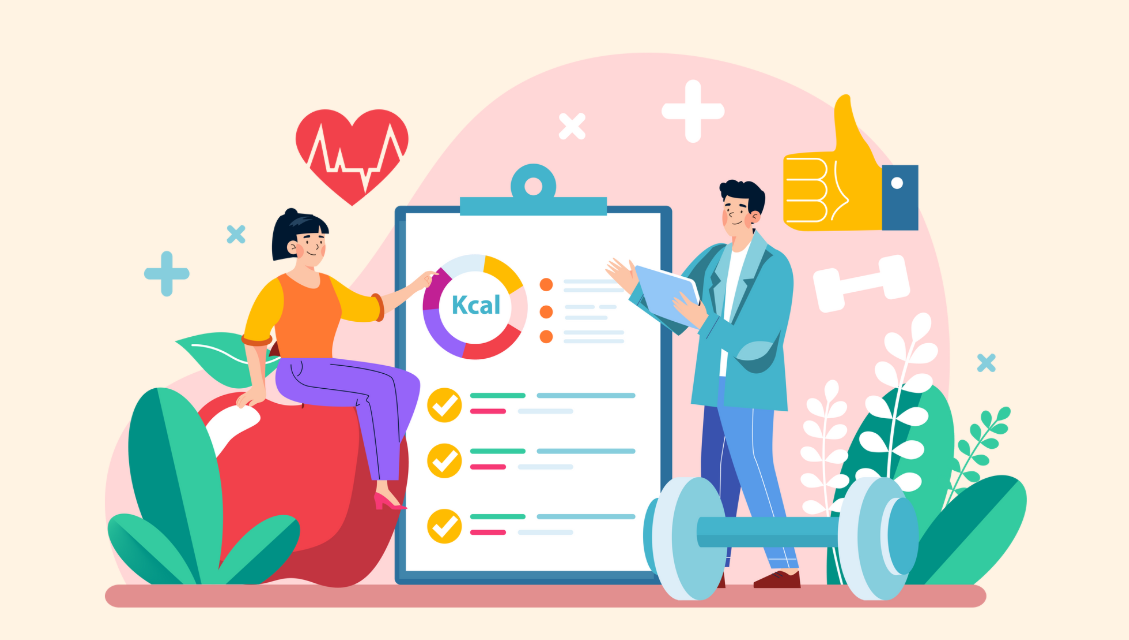

##**Predicting Age Group from Health Indicators**


# Data Mining Project

## 👥 Team Members



| Name             | ID       |
|------------------|----------|
| Sahar Ismail     | 4355980  |
| Asma Almutrafi   | 4350920  |
| Farah Habib      | 4356057  |
| Wed Alhazmi      | 4350133  |


## Section 1: Reading Data & Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as colors
!pip install kneed
from kneed import KneeLocator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes = True)

In [ ]:
# Install and import the 'gdown' library to enable downloading files directly from Google Drive.
!pip install -U gdown
import gdown

# Define the Google Drive file ID and download the CSV file to the working directory.
file_id = "1n0oZEwUfVlxDujigNXA4HH-BSavAIxFz"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "NHANES_age_prediction.csv", quiet=False)

# Import pandas and load the downloaded CSV file into a DataFrame for further analysis.
import pandas as pd
df = pd.read_csv("NHANES_age_prediction.csv")

Downloading...
From: https://drive.google.com/uc?id=1n0oZEwUfVlxDujigNXA4HH-BSavAIxFz
To: /content/NHANES_age_prediction.csv
100%|██████████| 120k/120k [00:00<00:00, 8.98MB/s]


In [ ]:
df.head()

SEQN age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  \
0  73564.0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   
1  73568.0     Adult      26.0       2.0     2.0    20.3    89.0     2.0   
2  73576.0     Adult      16.0       1.0     2.0    23.2    89.0     2.0   
3  73577.0     Adult      32.0       1.0     2.0    28.9   104.0     2.0   
4  73580.0     Adult      38.0       2.0     1.0    35.9   103.0     2.0   

   LBXGLT  LBXIN  
0   150.0  14.91  
1    80.0   3.85  
2    68.0   6.14  
3    84.0  16.15  
4    81.0  10.92

In [ ]:
# Rename the columns to more descriptive and readable names for easier understanding and analysis.
df.rename(columns={
    'SEQN': 'ID',
    'RIDAGEYR': 'Age',
    'RIAGENDR': 'Gender',
    'PAQ605': 'PhysicalActivity',
    'BMXBMI': 'BMI',
    'LBXGLU': 'Glucose',
    'DIQ010': 'Diabetic',
    'LBXGLT': 'GlucoseTest',
    'LBXIN': 'Insulin'
}, inplace=True)

In [ ]:
# Convert the 'age_group' column from categorical text values to numeric values.
# 'Adult' is mapped to 1 and 'Senior' is mapped to 2.
df['age_group'] = df['age_group'].map({'Adult': 1, 'Senior': 2})

In [ ]:
# Remove the 'ID' column from the dataset to avoid using irrelevant or non-informative data
df.drop(columns=['ID'], inplace=True)

In [ ]:
# Display the first 20 rows to review and confirm all recent updates to the dataset
df.head(20)

age_group   Age  Gender  PhysicalActivity   BMI  Glucose  Diabetic  \
0           1  61.0     2.0               2.0  35.7    110.0       2.0   
1           1  26.0     2.0               2.0  20.3     89.0       2.0   
2           1  16.0     1.0               2.0  23.2     89.0       2.0   
3           1  32.0     1.0               2.0  28.9    104.0       2.0   
4           1  38.0     2.0               1.0  35.9    103.0       2.0   
5           1  50.0     1.0               2.0  23.6    110.0       2.0   
6           1  14.0     1.0               2.0  38.7     94.0       2.0   
7           1  57.0     2.0               2.0  38.3    107.0       2.0   
8           2  75.0     1.0               2.0  38.9     89.0       2.0   
9           1  43.0     1.0               1.0  28.9     90.0       2.0   
10          1  54.0     2.0               2.0  32.7     98.0       2.0   
11          1  36.0     2.0               1.0  27.3     85.0       2.0   
12          2  80.0     1.0               2.0  24.6    100.0       2.0   
13          1  43.0     2.0               2.0  30.5    102.0       2.0   
14          2  71.0     1.0               2.0  30.3    133.0       2.0   
15          2  67.0     2.0               1.0  22.1    114.0       2.0   
16          1  57.0     2.0               2.0  37.8     96.0       2.0   
17          1  54.0     1.0               2.0  28.0     89.0       2.0   
18          2  70.0     2.0               2.0  46.1    139.0       2.0   
19          1  25.0     1.0               2.0  21.0     86.0       2.0   

    GlucoseTest  Insulin  
0         150.0    14.91  
1          80.0     3.85  
2          68.0     6.14  
3          84.0    16.15  
4          81.0    10.92  
5         100.0     6.08  
6         202.0    21.11  
7         164.0    20.93  
8         113.0    17.47  
9          95.0     3.24  
10         80.0     7.16  
11         91.0     9.86  
12         97.0     4.33  
13        124.0    12.06  
14        295.0    22.92  
15        150.0    10.09  
16        120.0     9.61  
17         82.0     8.39  
18        154.0    42.67  
19         84.0     4.47

In [ ]:
df.tail()

age_group   Age  Gender  PhysicalActivity   BMI  Glucose  Diabetic  \
2273          1  38.0     2.0               2.0  33.5    100.0       2.0   
2274          1  61.0     1.0               2.0  30.0     93.0       2.0   
2275          1  34.0     1.0               2.0  23.7    103.0       2.0   
2276          1  60.0     2.0               2.0  27.4     90.0       2.0   
2277          1  26.0     1.0               2.0  24.5    108.0       2.0   

      GlucoseTest  Insulin  
2273         73.0     6.53  
2274        208.0    13.02  
2275        124.0    21.41  
2276        108.0     4.99  
2277        108.0     3.76

In [ ]:
# Print the number of missing (null) values in each column to identify any data that needs cleaning
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age_group           0
Age                 0
Gender              0
PhysicalActivity    0
BMI                 0
Glucose             0
Diabetic            0
GlucoseTest         0
Insulin             0
dtype: int64


In [ ]:
# Displays basic info about the dataset, including column types, non-null counts, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age_group         2278 non-null   int64  
 1   Age               2278 non-null   float64
 2   Gender            2278 non-null   float64
 3   PhysicalActivity  2278 non-null   float64
 4   BMI               2278 non-null   float64
 5   Glucose           2278 non-null   float64
 6   Diabetic          2278 non-null   float64
 7   GlucoseTest       2278 non-null   float64
 8   Insulin           2278 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 160.3 KB


In [ ]:
print(df.dtypes)

age_group             int64
Age                 float64
Gender              float64
PhysicalActivity    float64
BMI                 float64
Glucose             float64
Diabetic            float64
GlucoseTest         float64
Insulin             float64
dtype: object


In [ ]:
# Check for duplicate rows in the dataset and print the total count of duplicates.
# This helps identify any repeated data that may need to be removed before analysis.
print("Number of duplicate rows:")
print(df.duplicated().sum())

Number of duplicate rows:
0


In [ ]:
df.shape

(2278, 9)

In [ ]:
df['age_group'].value_counts()


age_group
1    1914
2     364
Name: count, dtype: int64

In [ ]:
#---------------------------------------------
#The End of Data Preprocessing
#---------------------------------------------

##  Section 2: Descriptive Statistics & Data Visualization 📊

###2.1 Descriptive Statistics

In [ ]:
df.describe()

age_group          Age       Gender  PhysicalActivity          BMI  \
count  2278.000000  2278.000000  2278.000000       2278.000000  2278.000000   
mean      1.159789    41.795874     1.511414          1.822651    27.955180   
std       0.366491    20.156111     0.499979          0.398918     7.248962   
min       1.000000    12.000000     1.000000          1.000000    14.500000   
25%       1.000000    24.000000     1.000000          2.000000    22.800000   
50%       1.000000    41.000000     2.000000          2.000000    26.800000   
75%       1.000000    58.000000     2.000000          2.000000    31.200000   
max       2.000000    80.000000     2.000000          7.000000    70.100000   

           Glucose     Diabetic  GlucoseTest      Insulin  
count  2278.000000  2278.000000  2278.000000  2278.000000  
mean     99.553117     2.016242   114.978929    11.834794  
std      17.889834     0.185556    47.061239     9.718812  
min      63.000000     1.000000    40.000000     0.140000  
25%      91.000000     2.000000    87.000000     5.860000  
50%      97.000000     2.000000   105.000000     9.040000  
75%     104.000000     2.000000   130.000000    14.440000  
max     405.000000     3.000000   604.000000   102.290000

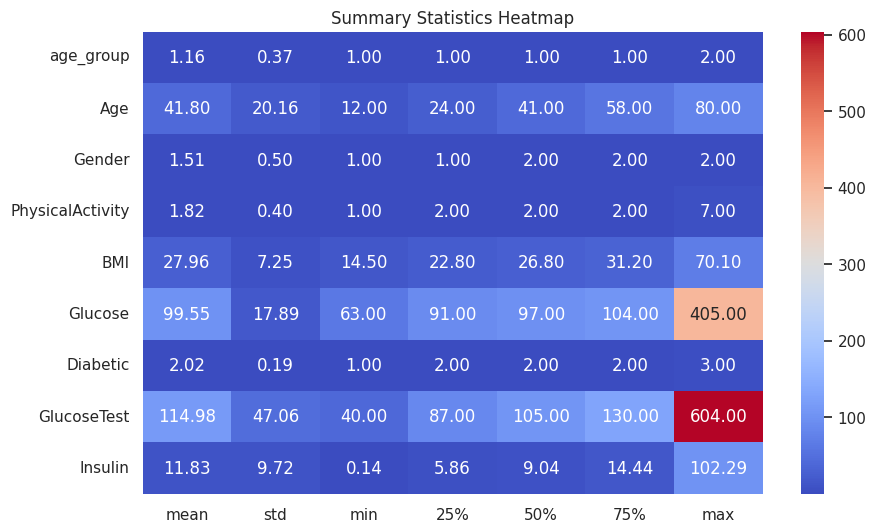

In [ ]:
desc = df.describe().T
plt.figure(figsize=(10, 6))
sns.heatmap(desc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']], annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Summary Statistics Heatmap')
plt.show()

In [ ]:
#here we will focus on the Age attribute #
print(" the mean of ages : ")
print(df['Age'].mean())
print("\n")

print ("the Standard Deviation of ages:  ")
print(df['Age'].std())
print("\n")
print ("the maxiumam of ages:  ")
print(df['Age'].max())
print("\n")
print ("the minimum of ages:  ")
print(df['Age'].min())
print("\n")
print ("the median of ages:  ")
print(df['Age'].median())
print("\n")
print ("the range of ages:  ")
print(df['Age'].max() - df['Age'].min())


 the mean of ages : 
41.79587357330992


the Standard Deviation of ages:  
20.156110993185283


the maxiumam of ages:  
80.0


the minimum of ages:  
12.0


the median of ages:  
41.0


the range of ages:  
68.0


###2.2 Data Visualization

####2.2.1 Histogram

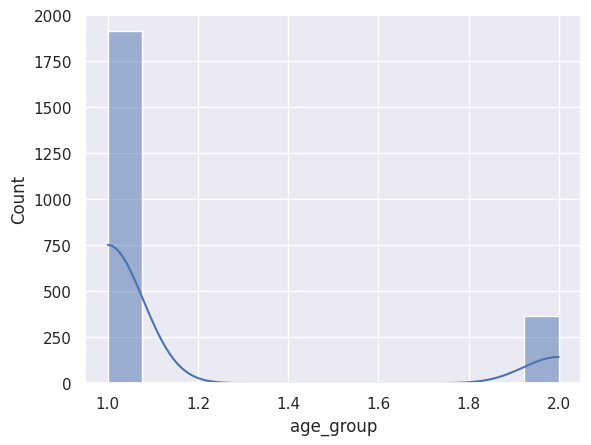

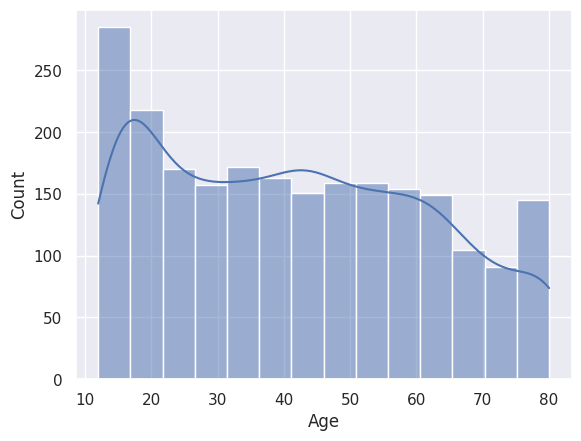

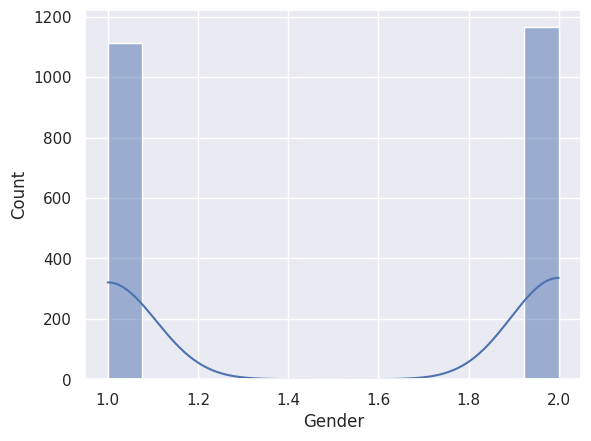

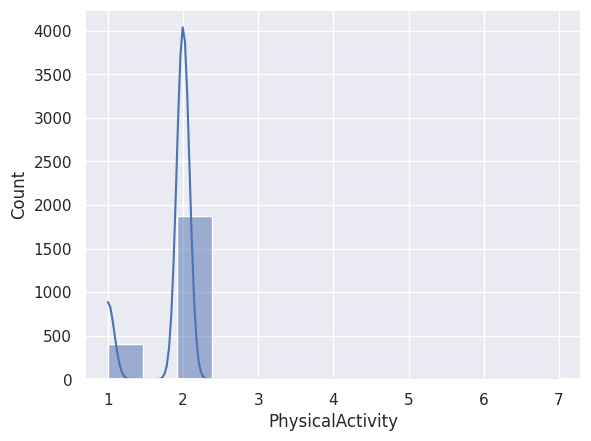

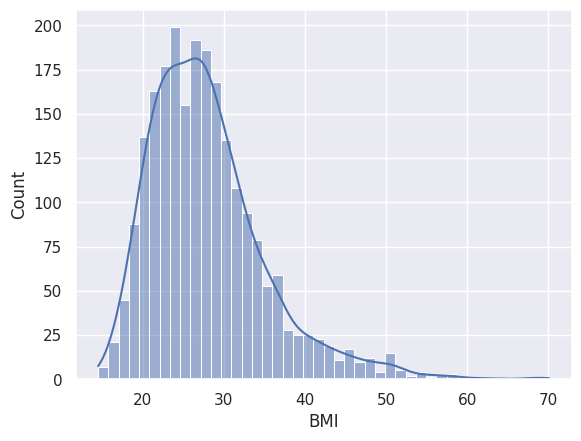

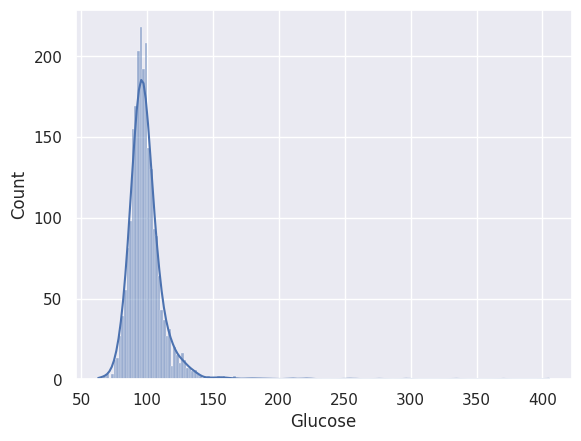

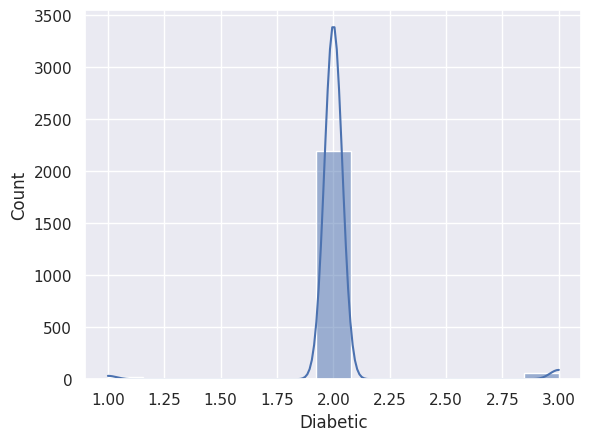

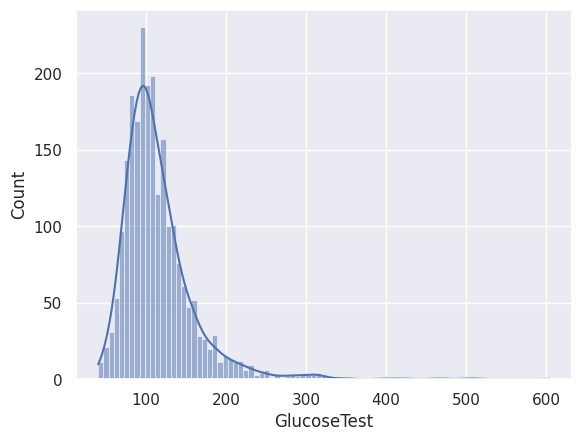

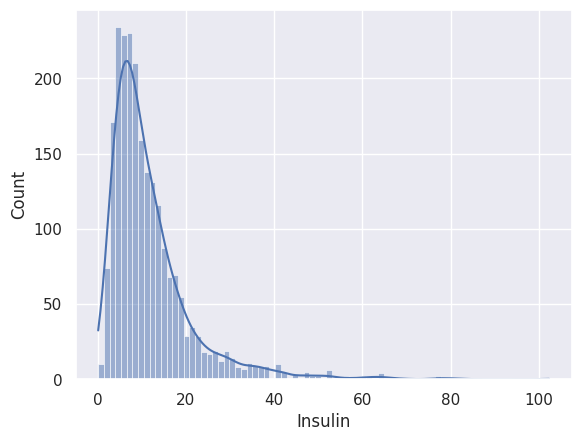

In [ ]:
# Plotting histogram with KDE for each column to show data distribution
for col in df:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

<ipython-input-592-418f962a923f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


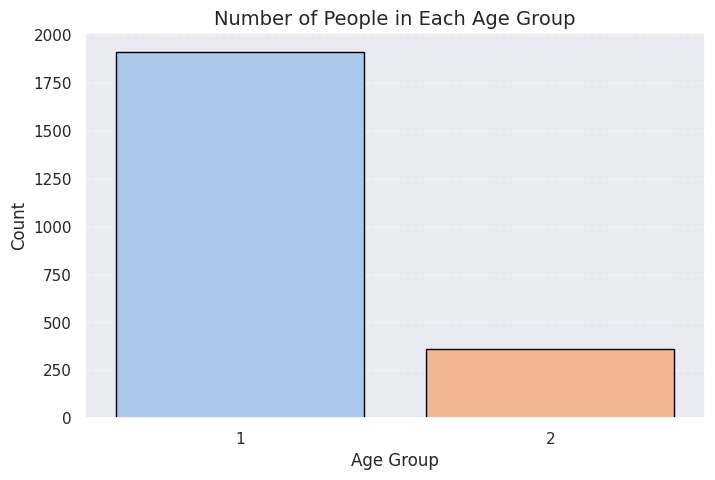

In [ ]:
# the distribution of people across different age groups
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='age_group',
    palette='pastel',
    edgecolor='black'
)

plt.title('Number of People in Each Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

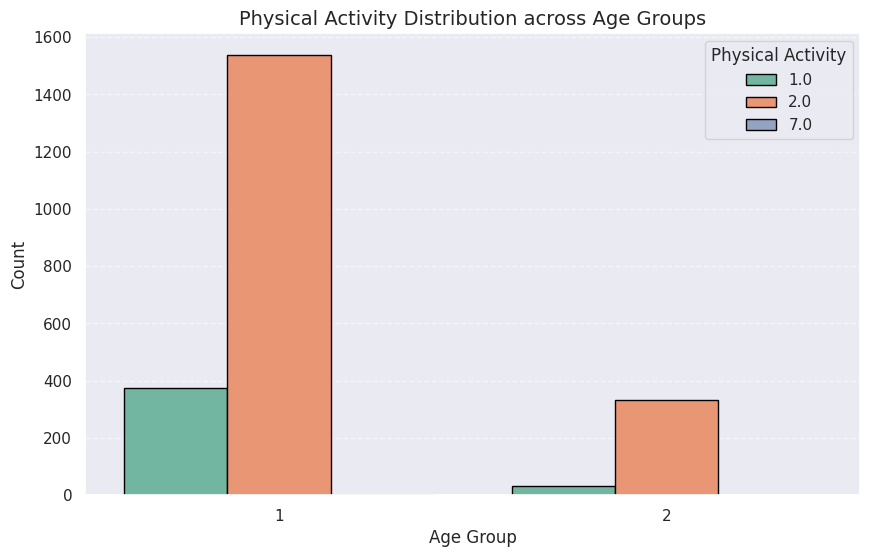

In [ ]:
#- Value 1: Refers to individuals who do not engage in regular physical activity or have low physical activity levels
#- Value 2: Refers to individuals who engage in moderate to high levels of physical activity
#- Value 7: May indicate missing or unknown cases, and can be ignored or handled as needed
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='age_group',
    hue='PhysicalActivity',
    palette='Set2',
    edgecolor='black'
)

plt.title('Physical Activity Distribution across Age Groups', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Physical Activity')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

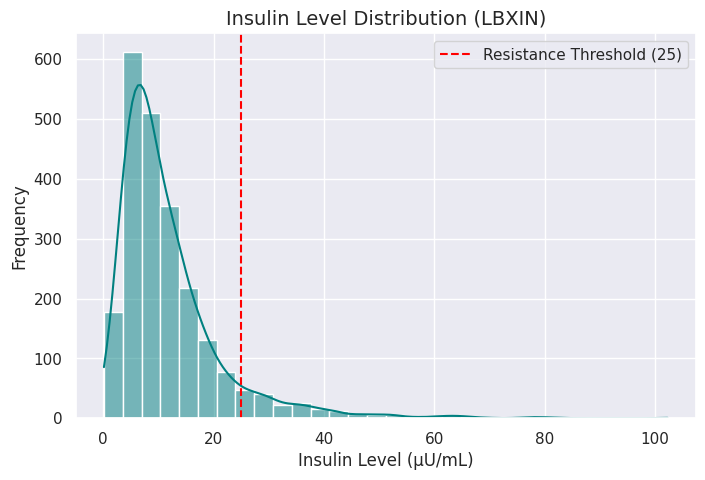

In [ ]:
#  here we focus on Insulin level  so , the normal insulin levels are usually between 2–25 μU/mL#
#A noticeable peak above 25 may indicate insulin resistance in some participants#

plt.figure(figsize=(8, 5))

sns.histplot(df['Insulin'], bins=30, kde=True, color='teal')

plt.title('Insulin Level Distribution (LBXIN)', fontsize=14)
plt.xlabel('Insulin Level (μU/mL)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(x=25, color='red', linestyle='--', label='Resistance Threshold (25)')
plt.legend()
plt.show()

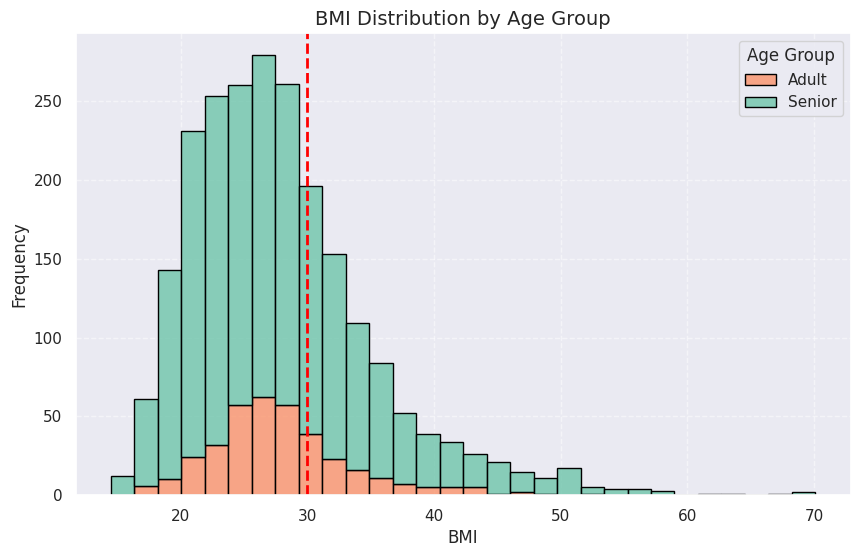

In [ ]:
#BMI Distribution for Each Age Group (Adult vs Senior)
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='BMI',
    hue='age_group',
    multiple='stack',
    palette='Set2',
    bins=30,
    edgecolor='black'
)

plt.title('BMI Distribution by Age Group', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
labels = ['Adult', 'Senior']
plt.legend(labels=labels, title='Age Group')
plt.axvline(x=30, color='red', linestyle='--', linewidth=2, label='Obesity Threshold (BMI=30)')

plt.show()


####2.2.2 Scatter plot

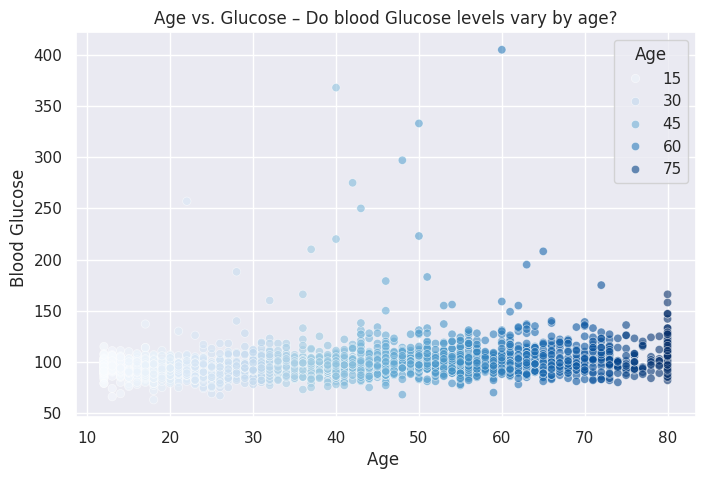

In [ ]:
# here we will discover if the age contributes to the increase or decrease in blood glucose levels
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Glucose', hue='Age', palette='Blues', alpha=0.6)
plt.title('Age vs. Glucose – Do blood Glucose levels vary by age?')
plt.xlabel('Age ')
plt.ylabel('Blood Glucose ')
plt.grid(True)
plt.show()

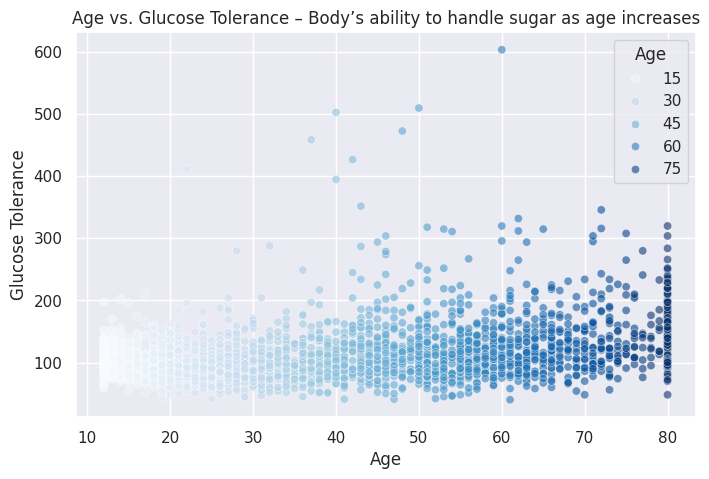

In [ ]:
 #This scatter plot illustrates the relationship between Age and Glucose Tolerance
 # Overall, there is a slight trend suggesting that glucose tolerance may increase with age
 # Older individuals (darker blue points) tend to show higher glucose tolerance levels compared to younger ones
 # However, the majority of data points remain concentrated within the 100-200 range across all ages
 # Some outliers with extremely high glucose tolerance values are observed, mainly between ages 30 to 60

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='GlucoseTest', hue='Age', palette='Blues', alpha=0.6)
plt.title('Age vs. Glucose Tolerance – Body’s ability to handle sugar as age increases')
plt.xlabel('Age')
plt.ylabel('Glucose Tolerance')
plt.grid(True)
plt.show()

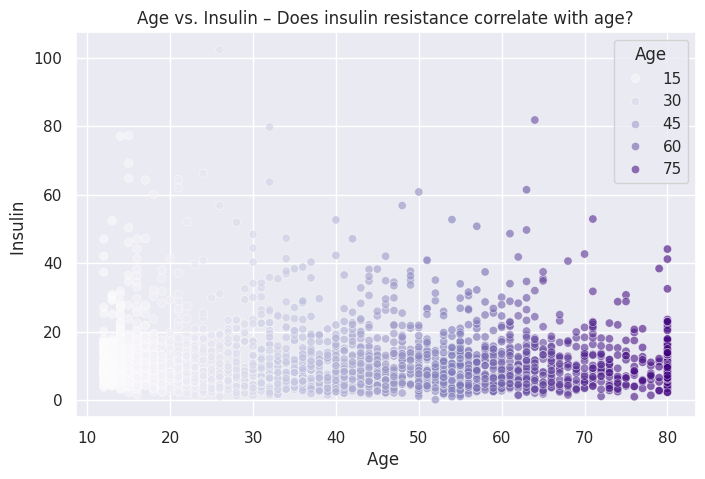

In [ ]:
#The scatter plot shows the relationship between Age and Insulin levels. Overall, there is a weak correlation,
 # as most individuals, regardless of age, have low insulin levels. A slight increase in the variability of insulin levels is observed with age,
 # but no strong pattern is detected. The color gradient represents different age groups, highlighting that higher insulin levels are rare across all ages

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Insulin',hue='Age',alpha=0.6, palette='Purples')
plt.title('Age vs. Insulin – Does insulin resistance correlate with age?')
plt.xlabel('Age ')
plt.ylabel('Insulin ')
plt.grid(True)
plt.show()

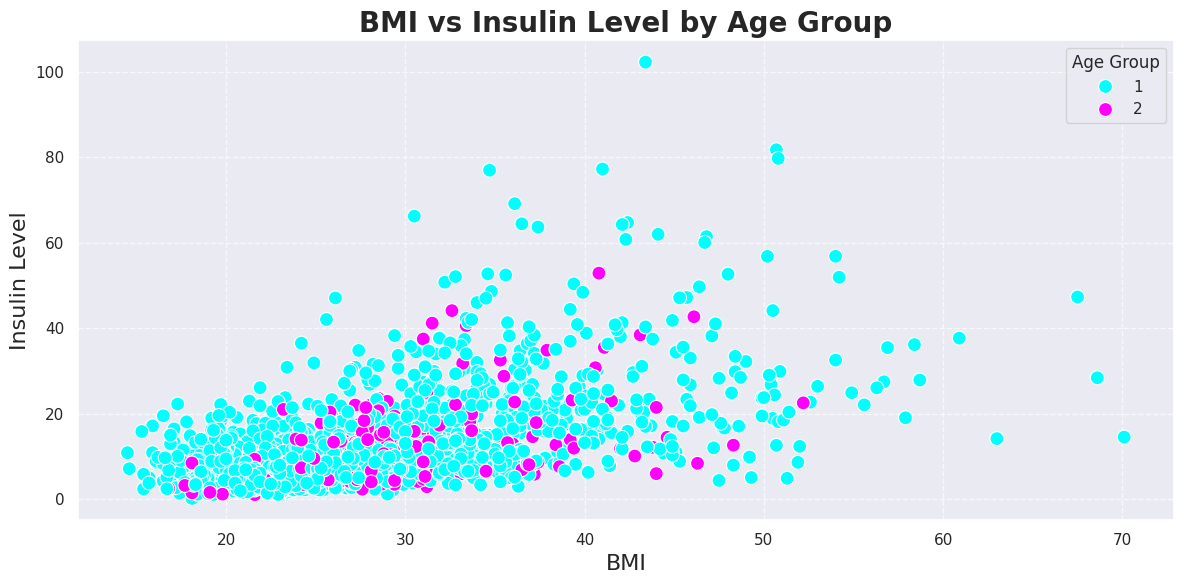

In [ ]:
#explores the three-way relationship between BMI, insulin levels, and age
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='BMI', y='Insulin', hue='age_group', palette='cool', s=100)
plt.title('BMI vs Insulin Level by Age Group', fontsize=20, fontweight='bold')
plt.xlabel('BMI', fontsize=16)
plt.ylabel('Insulin Level', fontsize=16)
plt.legend(title='Age Group')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('BMI_vs_Insulin.png')
plt.show()

####2.2.3 Box plot

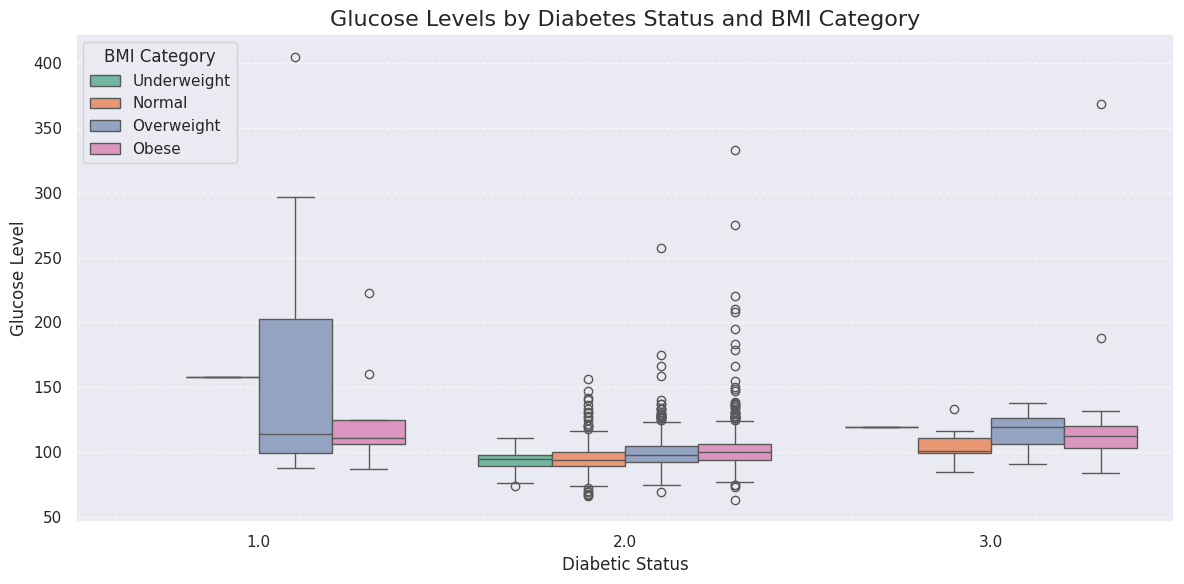

In [ ]:
#Comparison of glucose levels between diabetic and non-diabetic individuals within each BMI category
df_bmi = df.copy()
bins = [0, 18.5, 24.9, 29.9, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df_bmi['BMI_Category'] = pd.cut(df_bmi['BMI'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_bmi, x='Diabetic', y='Glucose', hue='BMI_Category', palette='Set2')
plt.title('Glucose Levels by Diabetes Status and BMI Category', fontsize=16)
plt.xlabel('Diabetic Status', fontsize=12)
plt.ylabel('Glucose Level', fontsize=12)
plt.legend(title='BMI Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


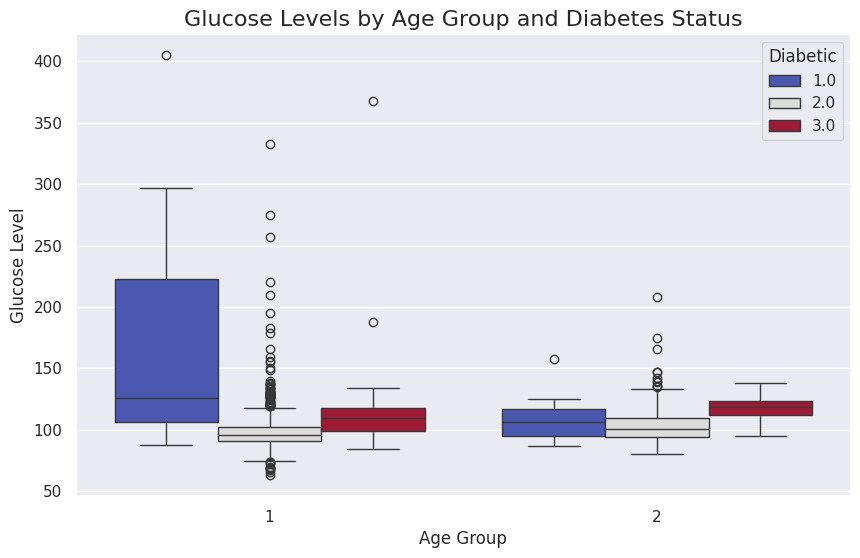

In [ ]:
#The relationship between glucose levels based on age group and diabetic status
# 1: "Diabetic" status
# 2: "Non-Diabetic" status
# 3: "Borderline"

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='Glucose', hue='Diabetic', palette='coolwarm')
plt.title('Glucose Levels by Age Group and Diabetes Status', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Glucose Level', fontsize=12)
plt.show()

<ipython-input-602-b32e8fa86de2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='BMI', palette='pastel')


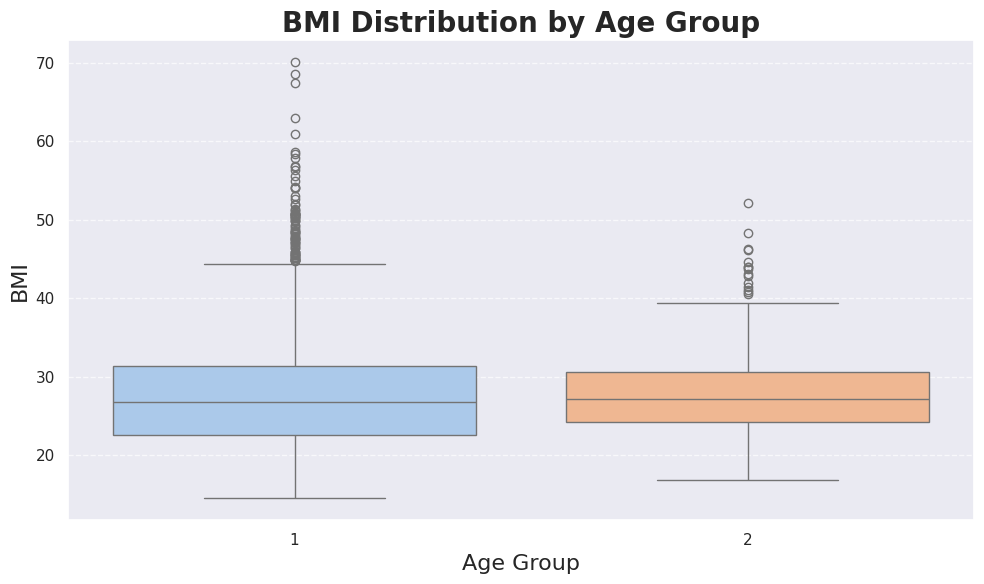

In [ ]:
#Shows how BMI differs between adults and seniors
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='BMI', palette='pastel')
plt.title('BMI Distribution by Age Group', fontsize=20, fontweight='bold')
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('BMI', fontsize=16)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('BMI_Distribution.png')
plt.show()

<Axes: xlabel='Age'>

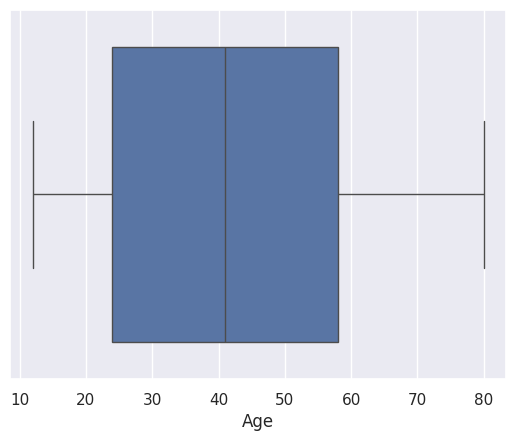

In [ ]:
# here we focus on the outliers and as you can see there is no individual points beyond the whiskers , so there is no outliers #
sns.boxplot(x=df['Age'])


####2.2.4 line plot

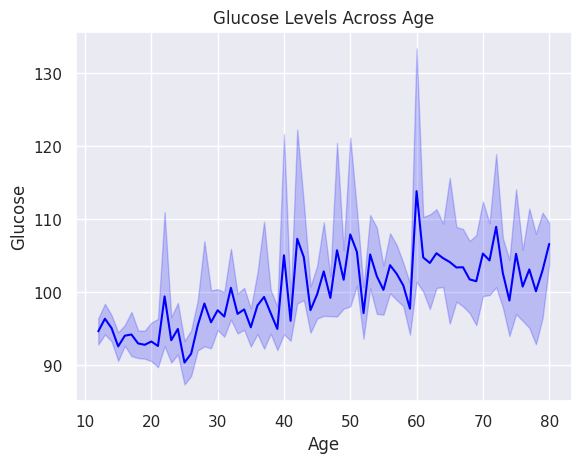

In [ ]:
# Sorts data by age and plots a line chart showing the relationship between age and glucose levels
df_sorted = df.sort_values(by='Age')
sns.lineplot(x='Age', y='Glucose', data=df_sorted, color='blue')
plt.title('Glucose Levels Across Age')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.grid(True)
plt.show()

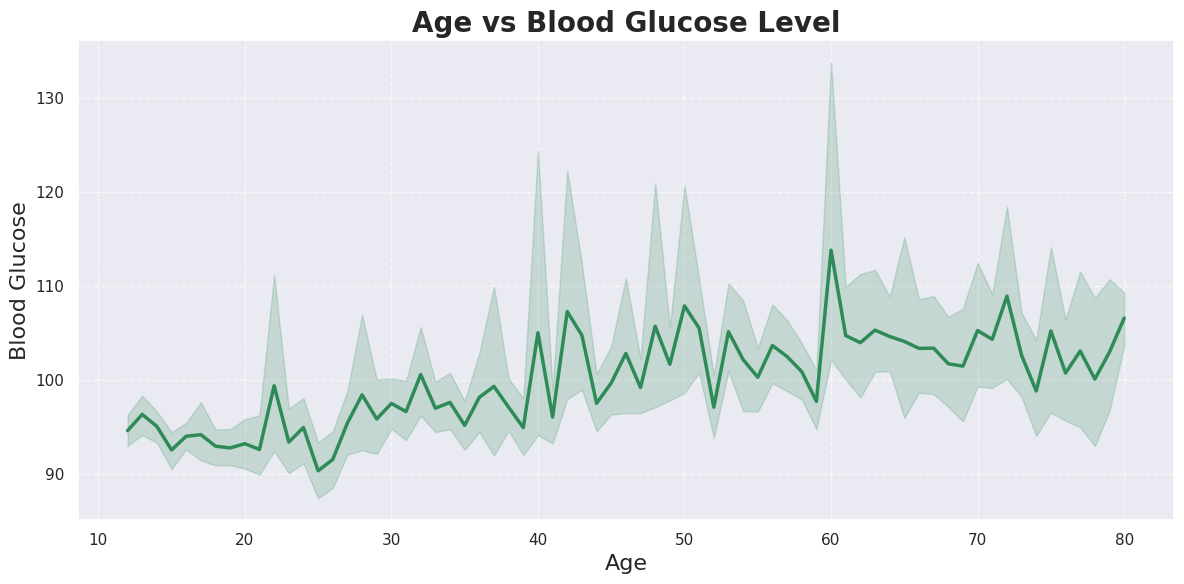

In [ ]:
# the relationship between age and blood glucose level
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Age', y='Glucose', color='seagreen', linewidth=2.5)
plt.title('Age vs Blood Glucose Level', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Blood Glucose', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('Age_vs_Glucose.png')
plt.show()

####2.2.5 Pair plot all features

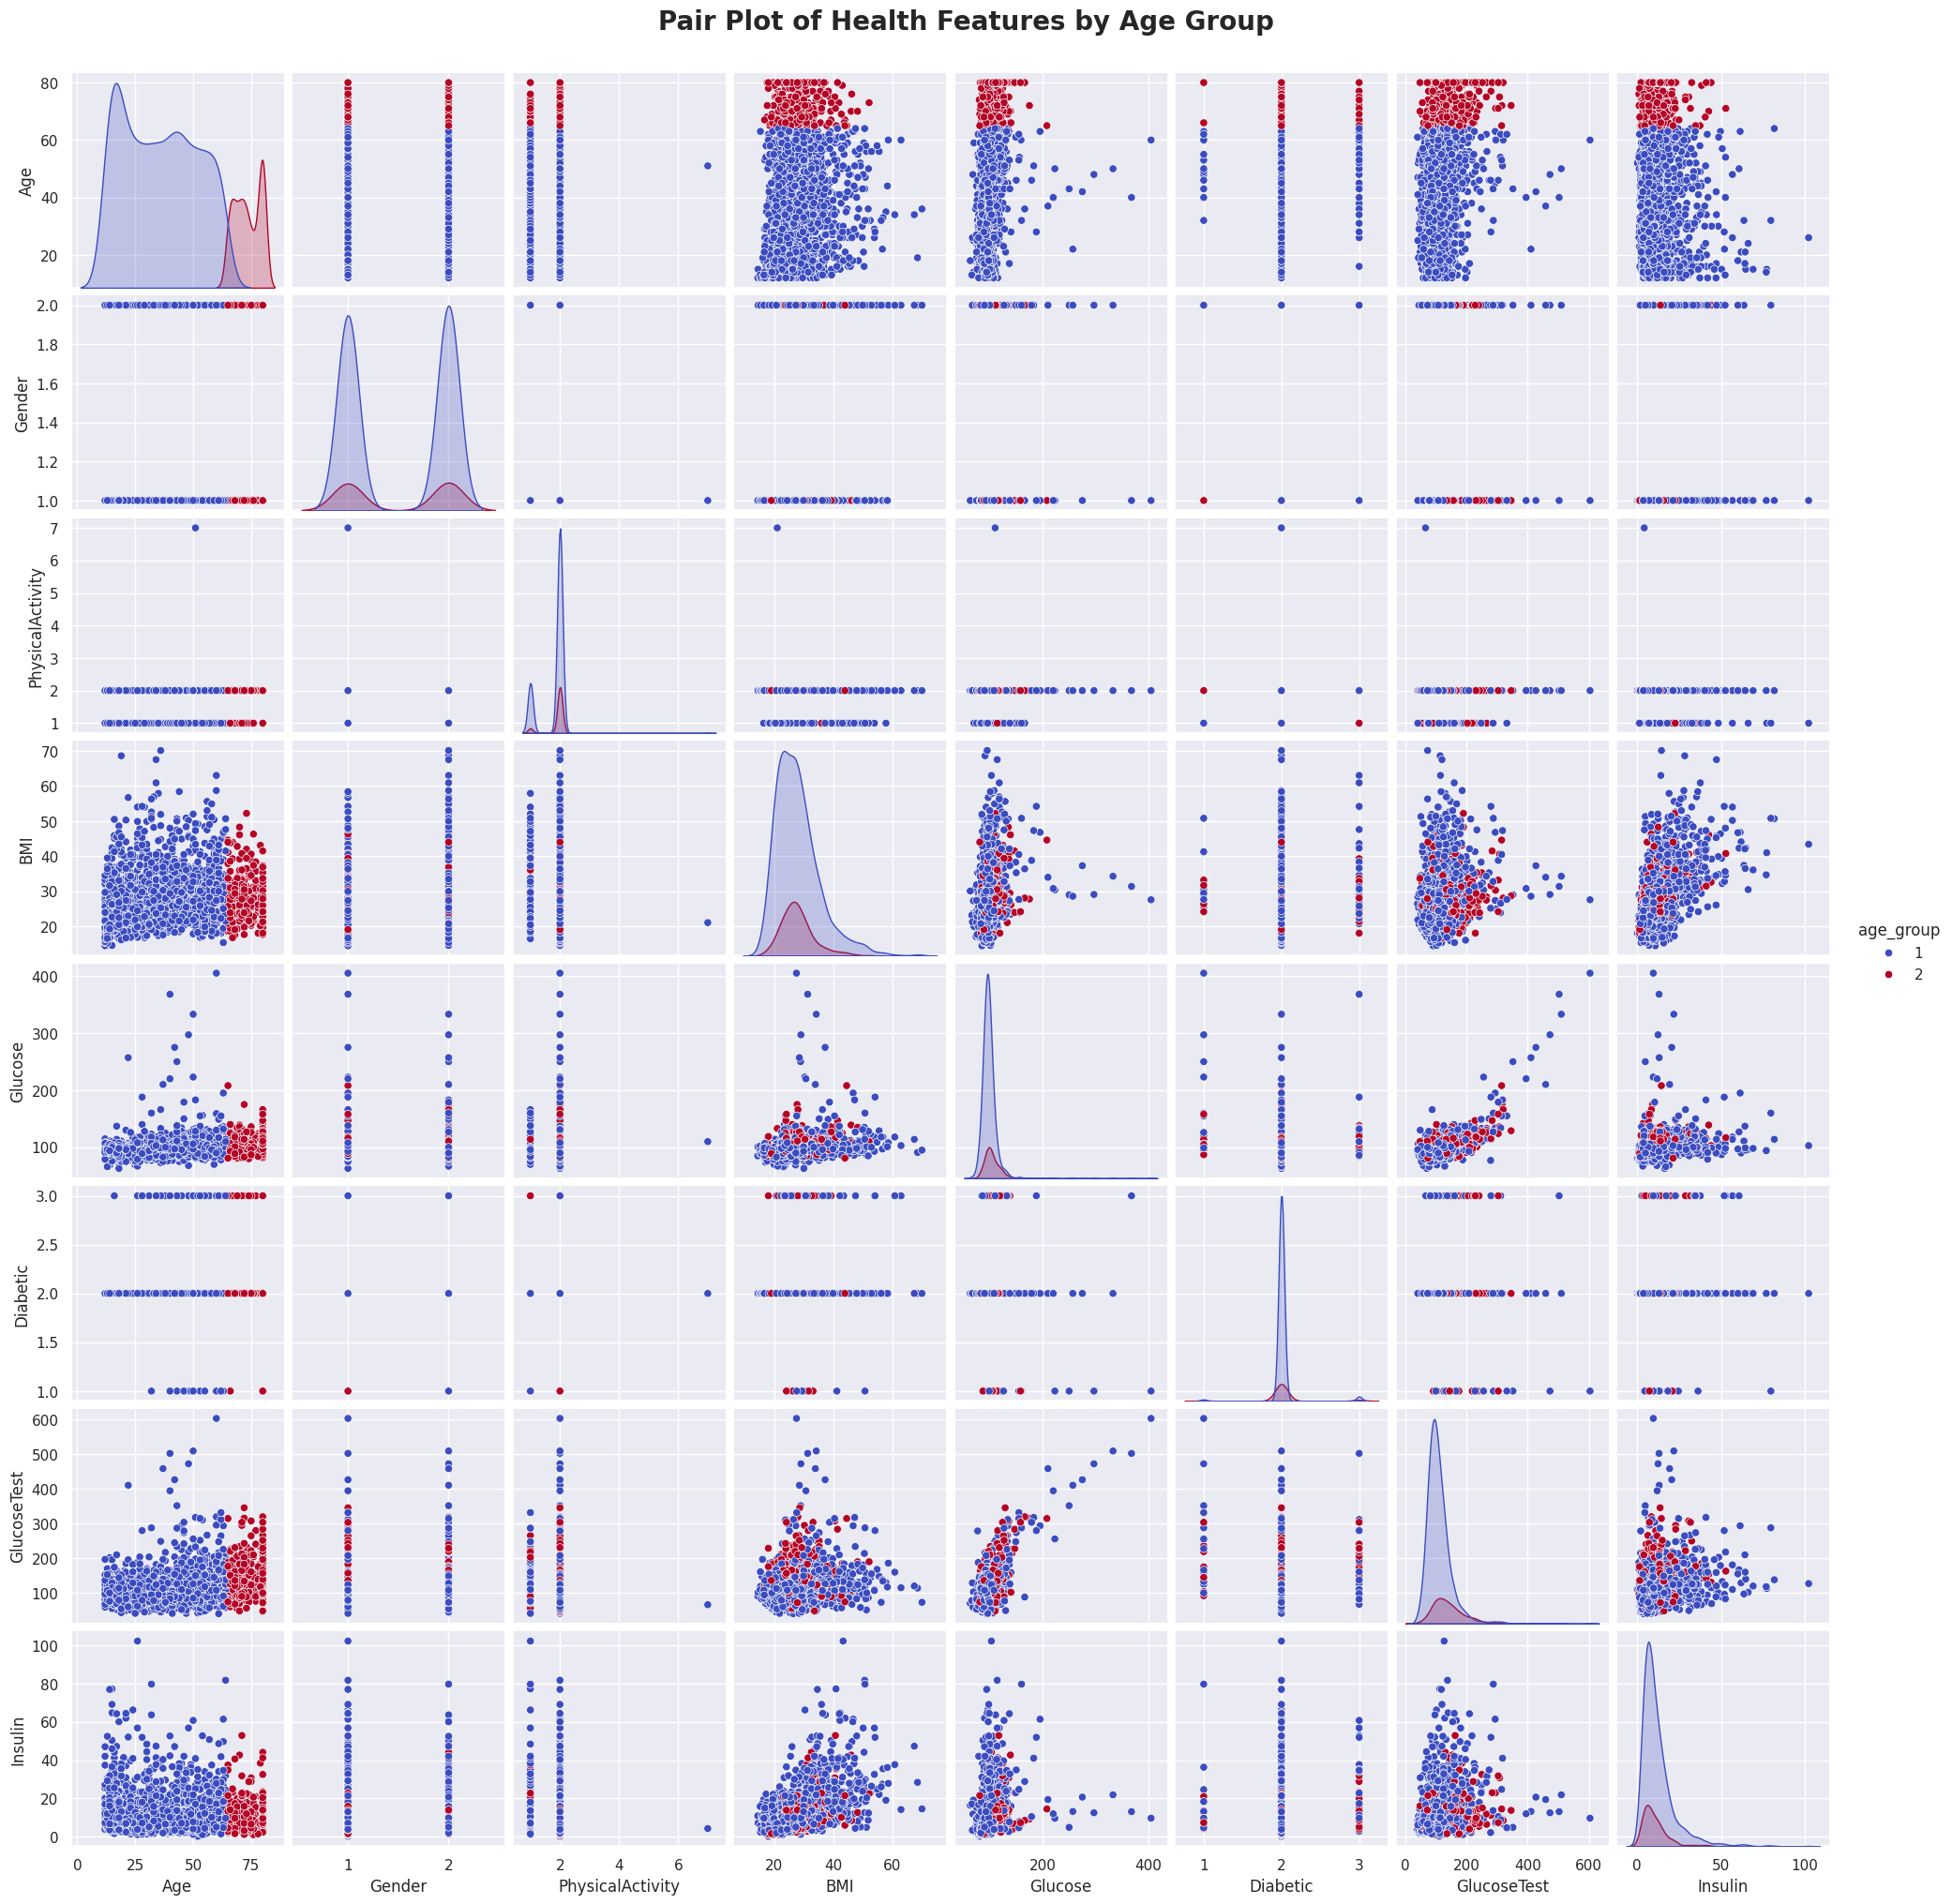

In [ ]:
#shows if age groups differ and how features are related by looking at patterns and separations
#Diagonal points → strong link between variables
#Separated colors → age groups are different
#Mixed points → no clear relationship
#Different KDE shapes → different distributions between age groups

sns.pairplot(df, hue='age_group', diag_kind='kde', palette='coolwarm', height=2.5)
plt.suptitle('Pair Plot of Health Features by Age Group', y=1.02, fontsize=20, fontweight='bold')
plt.savefig('Pair_Plot.png')
plt.show()

####2.2.6 Bar chart

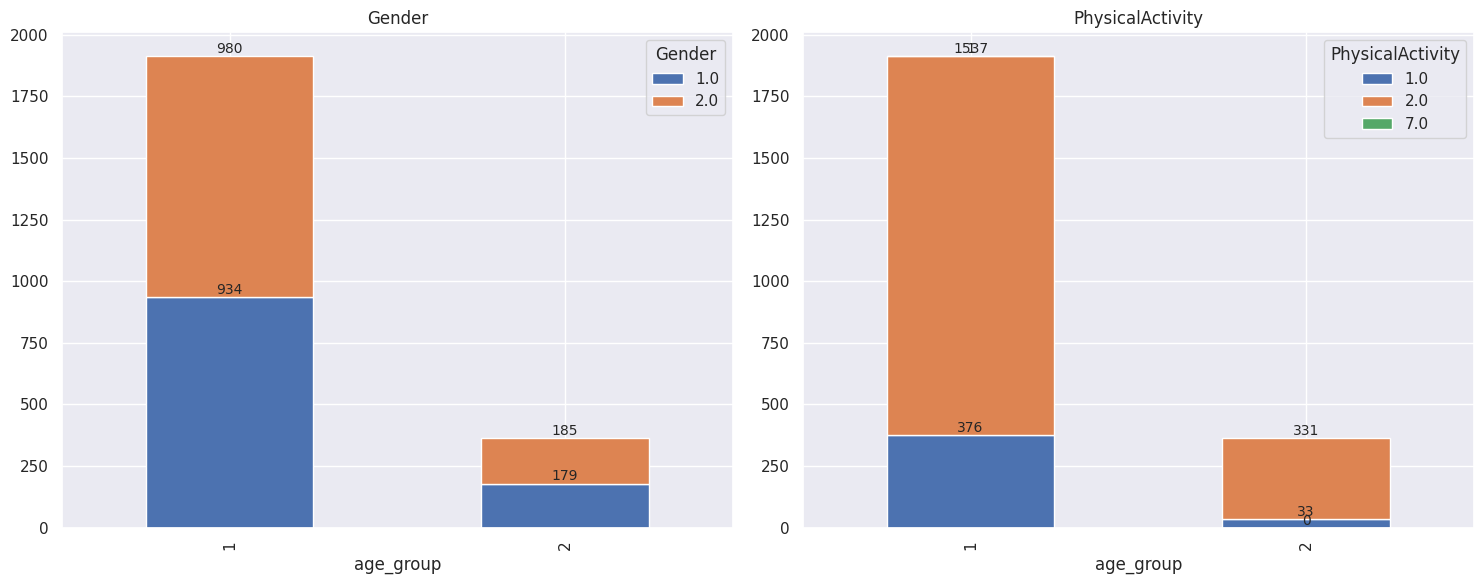

In [ ]:
# compares Gender and Physical Activity across different age groups
# shows if certain age groups have more males/females or different activity levels

def bar_labels(ax, spacing=0.01, alignment="center"):
    for bar in ax.patches:
        _x = bar.get_x() + bar.get_width() / 2
        _y = bar.get_y() + bar.get_height()
        value = int(bar.get_height())
        ax.text(_x, _y + spacing, str(value), ha=alignment, va='bottom', fontsize=10)
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

cats = ["age_group", "Gender", "PhysicalActivity"]
grouped = df.groupby(cats[0])

for i, j in enumerate(cats[1:]):
    grouped[j].value_counts().unstack().plot(kind="bar", stacked=True, ax=axes[i])
    bar_labels(axes[i], 0.05, "center")  # نستخدم الدالة هنا
    axes[i].set_title(j.replace('_', ' '))

plt.tight_layout()
plt.show()

#### 2.2.7 subplots

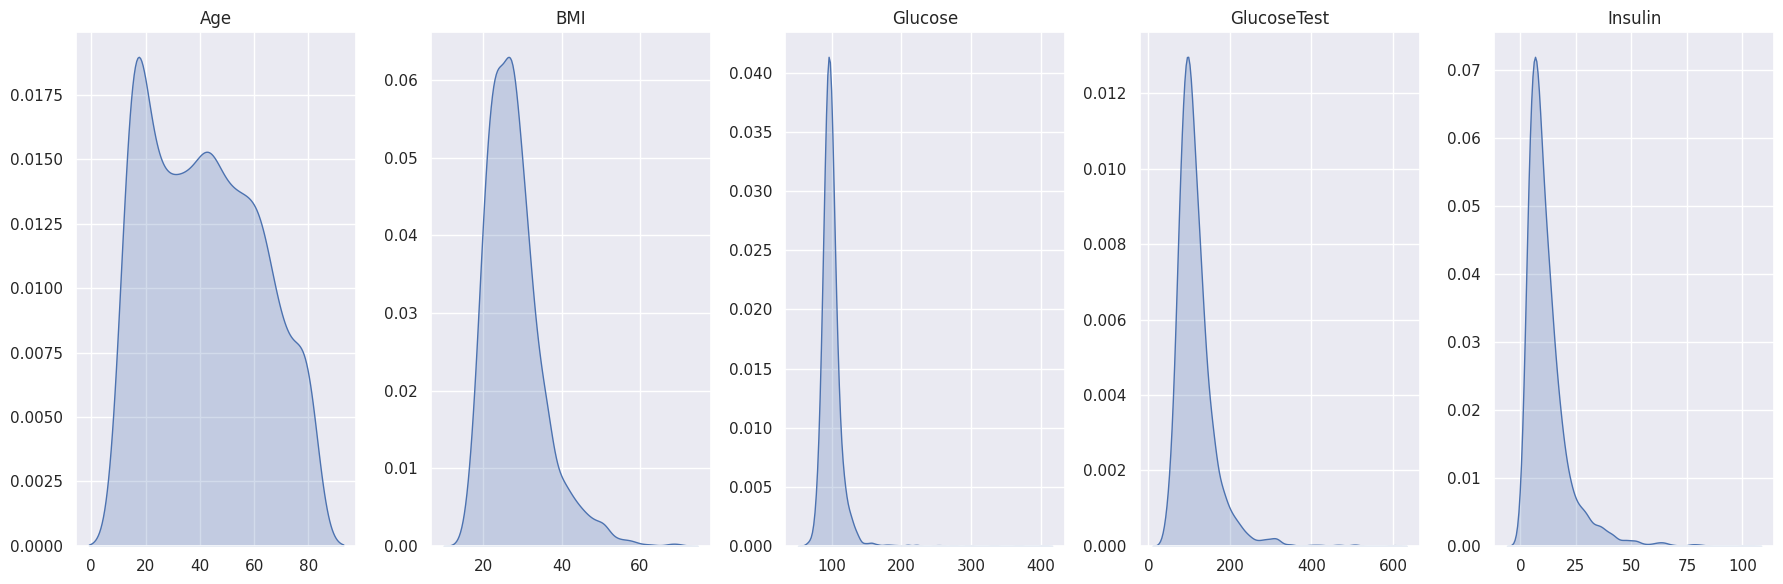

In [ ]:
# Shows the distribution of age, BMI, glucose, glucose test, and insulin
# Helps us see if values are concentrated or spread out, like if most people have high BMI or blood sugar

nums = ['Age', 'BMI', 'Glucose', 'GlucoseTest', 'Insulin']

fig, axes = plt.subplots(ncols=len(nums), figsize=(18, 6))

for i, j in enumerate(nums):
    sns.kdeplot(df, x=j, ax=axes[i], fill=True)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(j.replace('_', ' '))

plt.tight_layout()
plt.show()

###2.3 Correlation

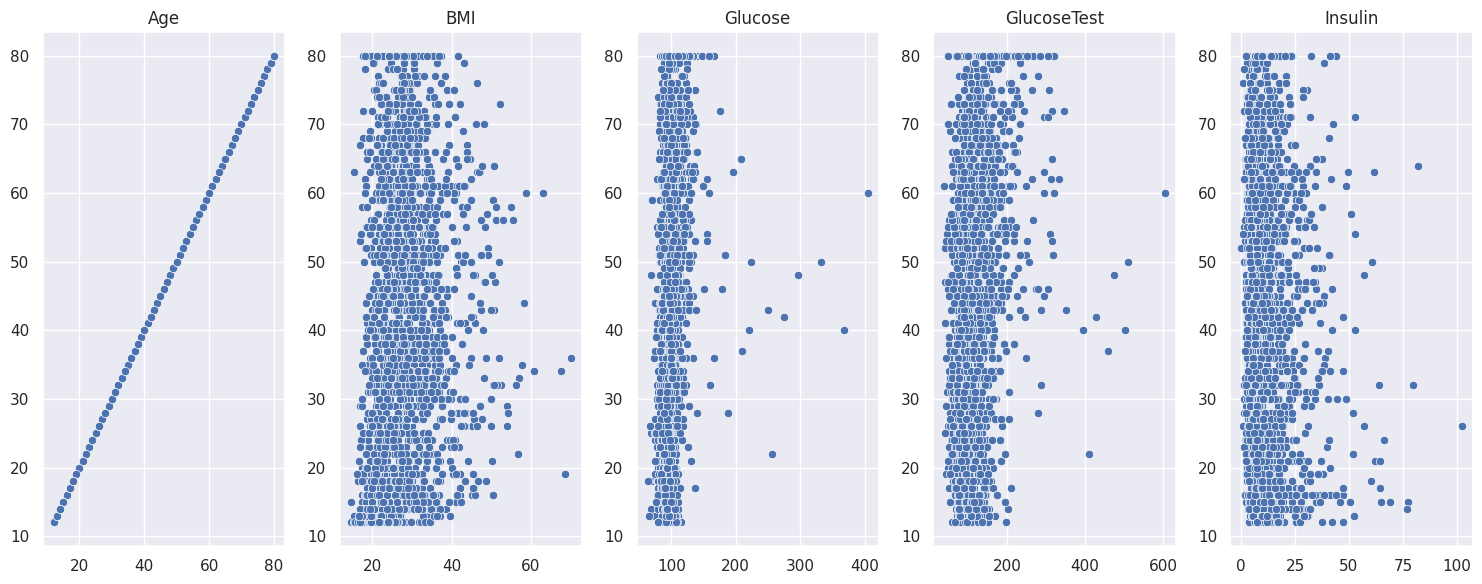

In [ ]:
# Overview of scatter plots:
# - Upward slope ➔ Positive correlation
# - Downward slope ➔ Negative correlation
# - Scattered points ➔ No strong correlation
# - Clusters ➔ Specific age groups with particular values
# - Outliers ➔ Points far from others, need attention

fig, axes = plt.subplots(ncols=5, figsize=(15, 6))

for i, j in enumerate(nums[0:]):
    sns.scatterplot(df, x=j, y=nums[0], ax=axes[i])
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(j.replace('_', ' '))
plt.tight_layout()
plt.show()

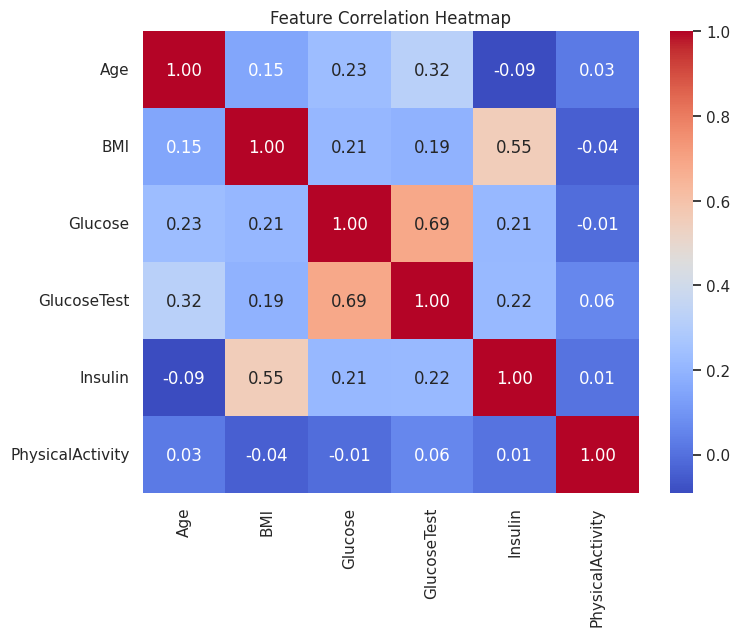

In [ ]:
#There is a strong positive correlation between Glucose and GlucoseTest (correlation value = 0.69), indicating that higher glucose levels are associated with higher glucose test results
#There is a moderate positive correlation between BMI and Insulin (correlation value = 0.55), suggesting that increased body mass index may be linked to higher insulin levels
#The relationship between Age and Insulin is weak and negative (correlation value = -0.09), meaning that there is no significant correlation between them
#There is a negligible correlation between Physical Activity and all other variables (correlation values close to 0)

cols =['Age', 'BMI', 'Glucose', 'GlucoseTest', 'Insulin','PhysicalActivity']
corr = df[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

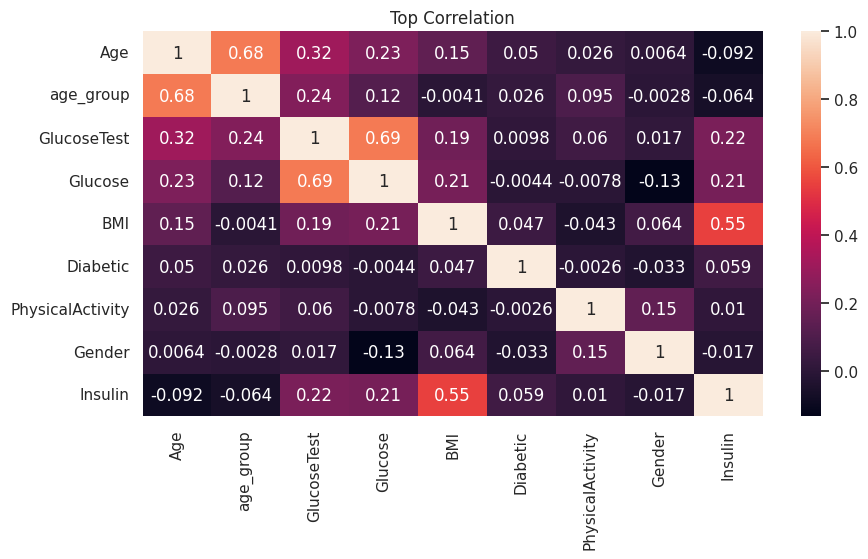

In [ ]:
#calculates the correlation matrix for numeric features in the dataset and visualizes the top 20 features correlated with 'Age' using a heatmap.

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
top_corr = numeric_df[corr.nlargest(20, 'Age')['Age'].index].corr()

figure, ax1 = plt.subplots(nrows=1, ncols=1)
plt.title('Top Correlation')
sns.heatmap(data=top_corr, annot=True)
figure.set_size_inches(10, 5)
plt.show()


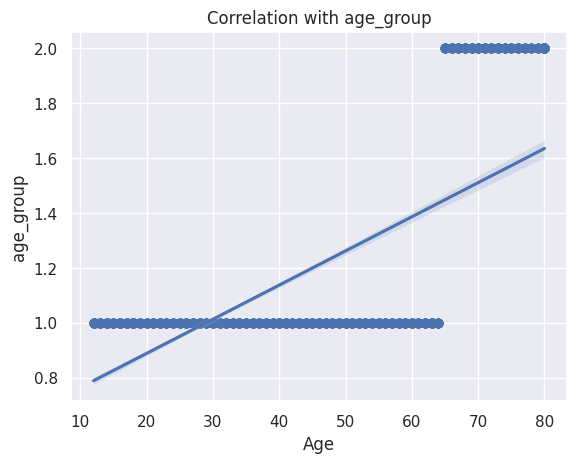

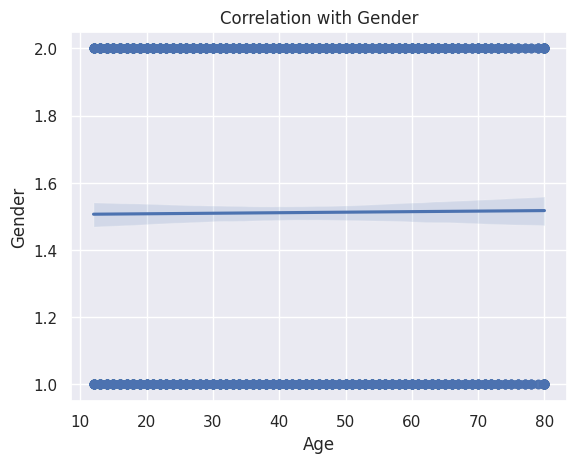

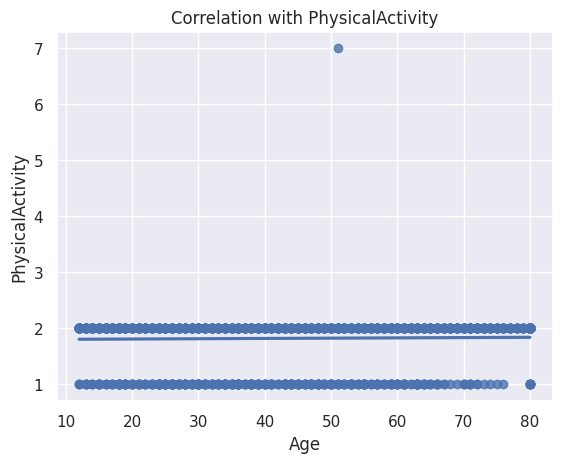

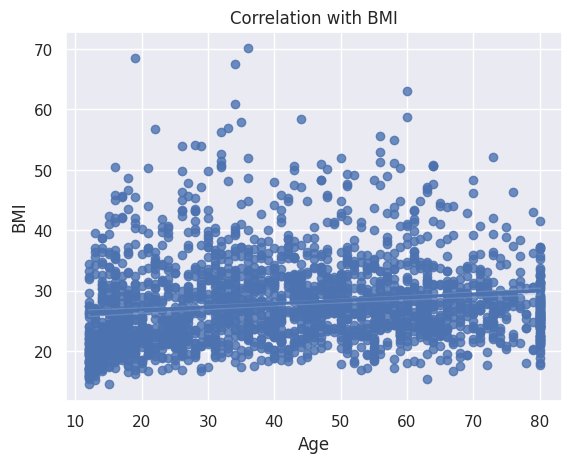

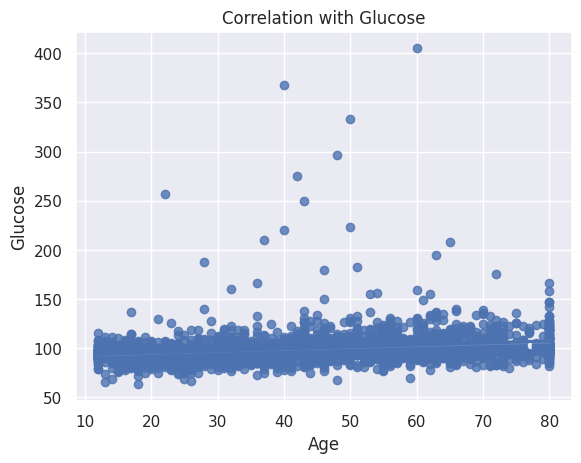

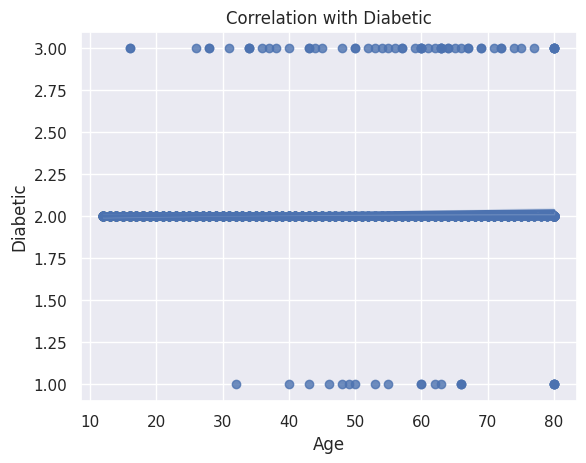

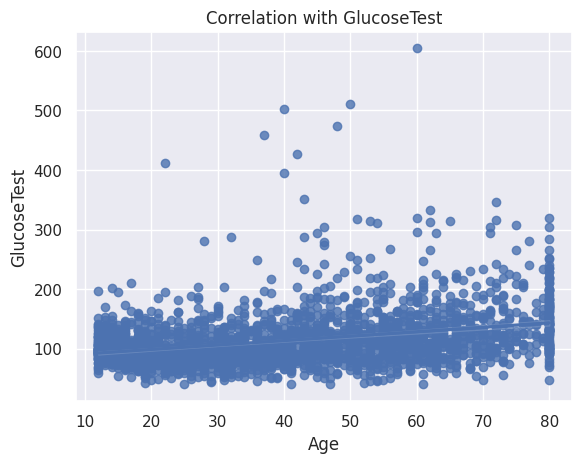

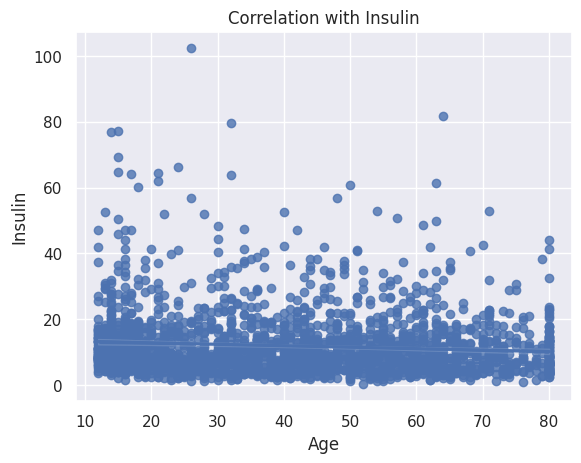

In [ ]:
#generates regression plots to visualize the correlation between 'Age' and other numeric features in the dataset, excluding 'Age' itself.

numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Loop through numeric columns only
for col in numeric_df.columns:
    if col != 'Age':  # Skip the 'Age' column as it's already used in the x-axis
        sns.regplot(x=numeric_df['Age'], y=numeric_df[col])
        plt.title("Correlation with " + col)
        plt.show()


##  Section 3: Principal Component Analysis (PCA) 🧠

In [ ]:
#--------------------------------------------
# Start of PCA
#--------------------------------------------

In [ ]:
# Preprocess features for PCA by selecting relevant columns and standardizing them

PCA_df = df

features = ['Diabetic', 'Age', 'Gender', 'PhysicalActivity', 'BMI', 'Glucose', 'GlucoseTest', 'Insulin']
x = PCA_df.loc[:, features].values
y = PCA_df.loc[:, ['age_group']].values

x = StandardScaler().fit_transform(x)

print(x)


[[-0.08755269  0.95297863  0.97742765 ...  0.58408464  0.74432296
   0.31648741]
 [-0.08755269 -0.78384872  0.97742765 ... -0.59002415 -0.74342728
  -0.82176167]
 [-0.08755269 -1.2800851  -1.02309363 ... -0.59002415 -0.99847018
  -0.58608442]
 ...
 [-0.08755269 -0.38685961 -1.02309363 ...  0.19271504  0.19173001
   0.98544031]
 [-0.08755269  0.90335499  0.97742765 ... -0.53411421 -0.14832719
  -0.70443762]
 [-0.08755269 -0.78384872 -1.02309363 ...  0.47226475 -0.14832719
  -0.83102409]]


In [ ]:
PCA_df.dropna(inplace=True)

In [ ]:
print(PCA_df.columns)

Index(['age_group', 'Age', 'Gender', 'PhysicalActivity', 'BMI', 'Glucose',
       'Diabetic', 'GlucoseTest', 'Insulin'],
      dtype='object')


In [ ]:
PCA_df

age_group   Age  Gender  PhysicalActivity   BMI  Glucose  Diabetic  \
0             1  61.0     2.0               2.0  35.7    110.0       2.0   
1             1  26.0     2.0               2.0  20.3     89.0       2.0   
2             1  16.0     1.0               2.0  23.2     89.0       2.0   
3             1  32.0     1.0               2.0  28.9    104.0       2.0   
4             1  38.0     2.0               1.0  35.9    103.0       2.0   
...         ...   ...     ...               ...   ...      ...       ...   
2273          1  38.0     2.0               2.0  33.5    100.0       2.0   
2274          1  61.0     1.0               2.0  30.0     93.0       2.0   
2275          1  34.0     1.0               2.0  23.7    103.0       2.0   
2276          1  60.0     2.0               2.0  27.4     90.0       2.0   
2277          1  26.0     1.0               2.0  24.5    108.0       2.0   

      GlucoseTest  Insulin  
0           150.0    14.91  
1            80.0     3.85  
2            68.0     6.14  
3            84.0    16.15  
4            81.0    10.92  
...           ...      ...  
2273         73.0     6.53  
2274        208.0    13.02  
2275        124.0    21.41  
2276        108.0     4.99  
2277        108.0     3.76  

[2278 rows x 9 columns]

In [ ]:
# Apply PCA to reduce dimensionality to 8 components and create DataFrames for the principal components and target labels

pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents, columns=[
    'Principle 1', 'Principle 2', 'Principle 3', 'Principle 4',
    'Principle 5', 'Principle 6', 'Principle 7', 'Principle 8'
])

targetDf = pd.DataFrame(data=y, columns=['age_group'])

print(principalDf)
print(targetDf)


      Principle 1  Principle 2  Principle 3  Principle 4  Principle 5  \
0        1.530944    -0.008626     1.145005     0.095330    -0.679080   
1       -1.738764    -0.238804     0.895094    -0.105189     0.212610   
2       -1.694588     0.179197    -0.598969    -0.249629     1.205657   
3       -0.103556     0.517098    -0.560484    -0.216463     0.950635   
4        0.003487     1.017305    -0.680204    -0.185212    -1.963047   
...           ...          ...          ...          ...          ...   
2273    -0.454927     0.469496     0.973784     0.024012    -0.432948   
2274     1.362159    -0.855570    -0.141323     0.109469     0.283289   
2275     0.272335     0.188513    -0.533755    -0.305344     1.254235   
2276    -0.446199    -0.591095     1.166814     0.346644    -0.816175   
2277    -0.533383    -0.647989    -0.604380    -0.295778     1.172782   

      Principle 6  Principle 7  Principle 8  
0        0.147099    -0.243107    -0.019464  
1       -0.694778    -0.059765 

In [ ]:
finalDf = pd.concat([principalDf, targetDf], axis=1)

finalDf

Principle 1  Principle 2  Principle 3  Principle 4  Principle 5  \
0        1.530944    -0.008626     1.145005     0.095330    -0.679080   
1       -1.738764    -0.238804     0.895094    -0.105189     0.212610   
2       -1.694588     0.179197    -0.598969    -0.249629     1.205657   
3       -0.103556     0.517098    -0.560484    -0.216463     0.950635   
4        0.003487     1.017305    -0.680204    -0.185212    -1.963047   
...           ...          ...          ...          ...          ...   
2273    -0.454927     0.469496     0.973784     0.024012    -0.432948   
2274     1.362159    -0.855570    -0.141323     0.109469     0.283289   
2275     0.272335     0.188513    -0.533755    -0.305344     1.254235   
2276    -0.446199    -0.591095     1.166814     0.346644    -0.816175   
2277    -0.533383    -0.647989    -0.604380    -0.295778     1.172782   

      Principle 6  Principle 7  Principle 8  age_group  
0        0.147099    -0.243107    -0.019464          1  
1       -0.694778    -0.059765    -0.207161          1  
2        0.276820    -0.391769     0.035544          1  
3        0.655119    -0.177545    -0.440956          1  
4       -0.935668    -0.733547    -0.472577          1  
...           ...          ...          ...        ...  
2273     0.031514    -1.035054    -0.490214          1  
2274     0.842559     0.536108     1.612655          1  
2275     0.302861     0.794431    -0.087825          1  
2276     0.293206    -0.029309     0.055862          1  
2277     0.051201    -0.701415    -0.047904          1  

[2278 rows x 9 columns]

Number of cpmonents that explain 95% of variance: 7


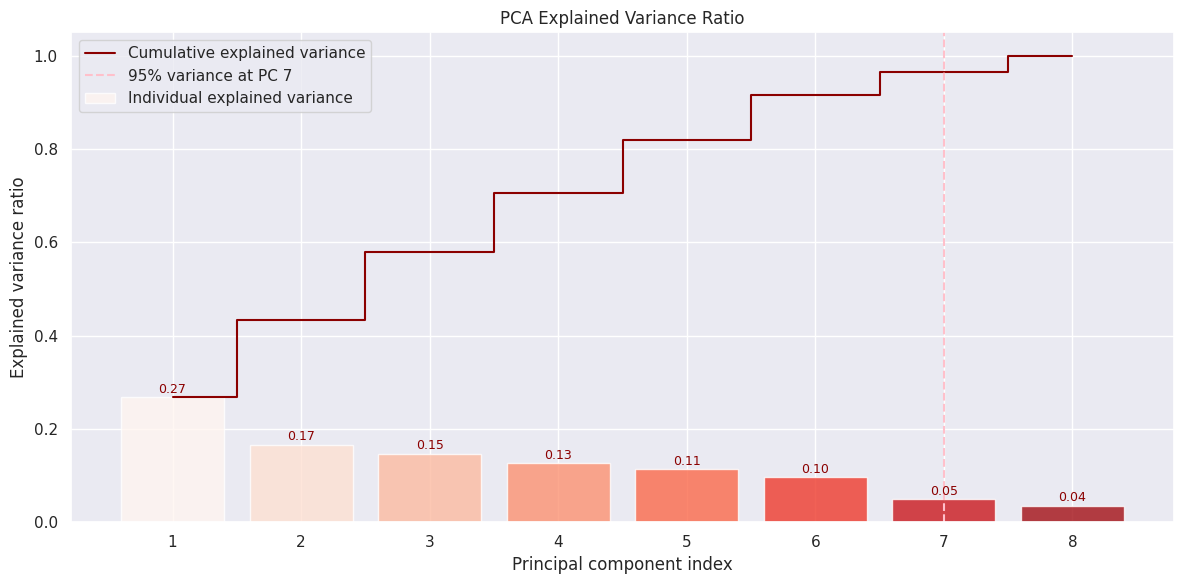

In [ ]:
# Apply PCA and visualize the explained variance ratio using a bar plot and cumulative line

pca = PCA()
x_pca = pca.fit_transform(x)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(12, 6))

red_cmap = cm.Reds
normalize = colors.Normalize(vmin=0, vmax=len(explained_variance_ratio))
bar_colors = [red_cmap(normalize(i)) for i in range(len(explained_variance_ratio))]

n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of cpmonents that explain 95% of variance: {n_components_95}')

bars = plt.bar(range(1, len(explained_variance_ratio) + 1),
               explained_variance_ratio,
               alpha=0.8,
               align='center',
               label='Individual explained variance',
               color=bar_colors)

plt.step(range(1, len(cumulative_variance_ratio) + 1),
         cumulative_variance_ratio,
         where='mid',
         color='darkred',
         label='Cumulative explained variance')

for i, ratio in enumerate(explained_variance_ratio):
    plt.text(i + 1, ratio + 0.01, f"{ratio:.2f}", ha='center', fontsize=9, color='darkred')

plt.axvline(x=n_components_95, color='pink', linestyle='--', label=f'95% variance at PC {n_components_95}')

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.title('PCA Explained Variance Ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


Optimal number of components (Elbow Point): 2


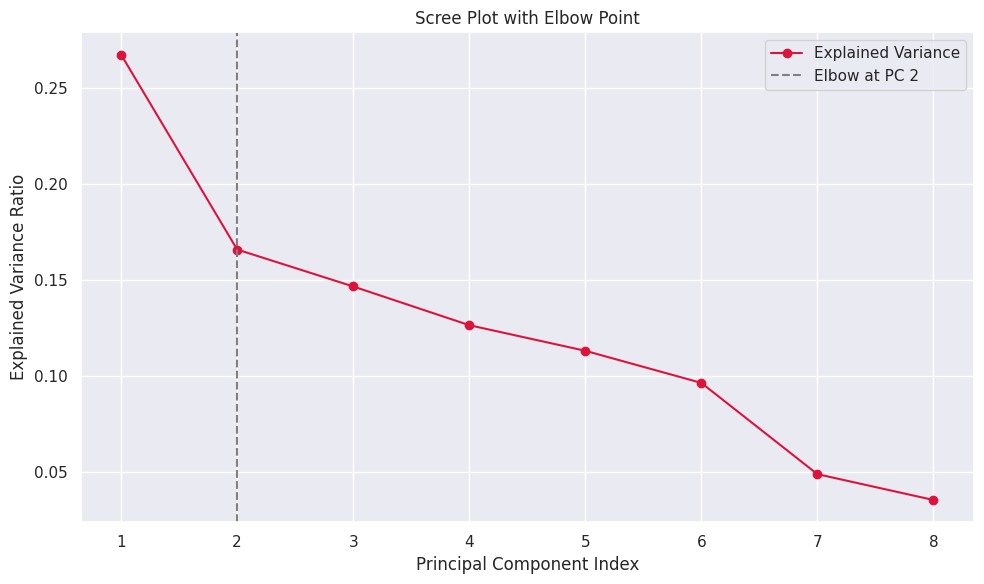

In [ ]:
# The code aims to apply Principal Component Analysis (PCA) for dimensionality reduction and identify the optimal number of principal components using the elbow point on the scree plot.

# Apply PCA on standardized data
pca = PCA()
x_pca = pca.fit_transform(x)
explained_variance_ratio = pca.explained_variance_ratio_

# Use KneeLocator to automatically determine the elbow point
knee = KneeLocator(range(1, len(explained_variance_ratio) + 1),
                   explained_variance_ratio,
                   curve="convex",
                   direction="decreasing")

elbow_point = knee.knee  # Identifying the elbow point
print(f"Optimal number of components (Elbow Point): {elbow_point}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1),
         explained_variance_ratio,
         marker='o', color='crimson', label='Explained Variance')

# Add vertical line at elbow point
if elbow_point is not None:
    plt.axvline(x=elbow_point, color='gray', linestyle='--', label=f'Elbow at PC {elbow_point}')

plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot with Elbow Point')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


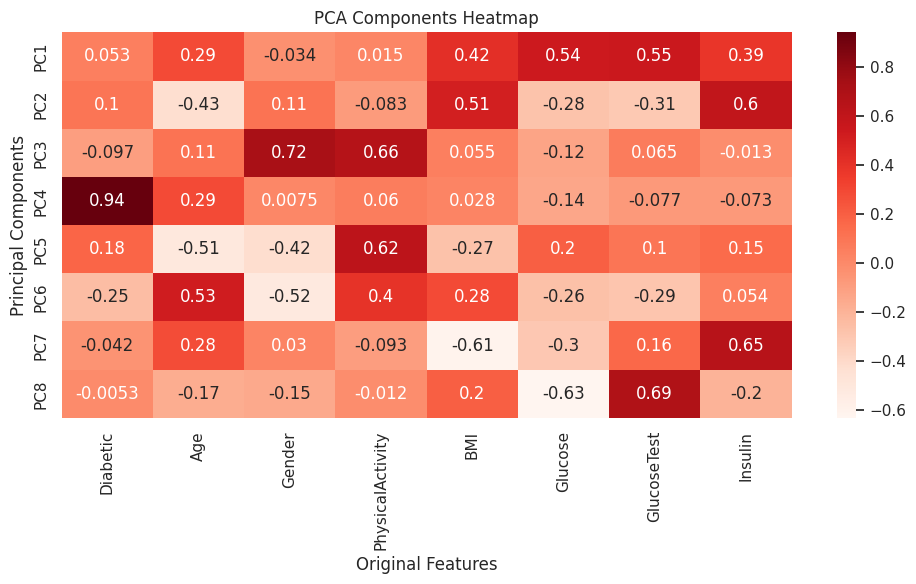

In [ ]:
# Visualize PCA components as a heatmap to understand how each original feature contributes to each principal component


feature_names = features

plt.figure(figsize=(10, 6))
sns.heatmap(pca.components_,
            cmap='Reds',
            xticklabels=feature_names,
            yticklabels=[f'PC{i+1}' for i in range(len(pca.components_))],
            annot=True)

plt.title('PCA Components Heatmap')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.tight_layout()
plt.show()


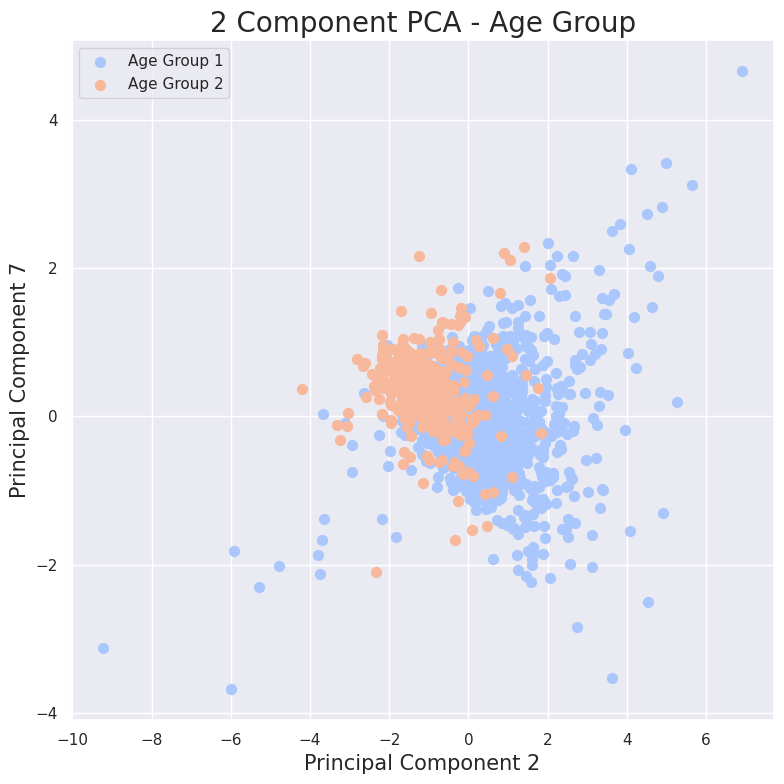

In [ ]:
# Visualize PCA 2D projection with labeled age groups

%matplotlib inline
sns.set(color_codes=True)

# Combine PCA results and target into one DataFrame
finalDf = pd.concat([principalDf[['Principle 2', 'Principle 7']], targetDf], axis=1)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xlabel('Principal Component 2', fontsize=15)
ax.set_ylabel('Principal Component 7', fontsize=15)
ax.set_title('2 Component PCA - Age Group', fontsize=20)

# Define unique age groups and assign colors
targets = finalDf['age_group'].unique()
colors = sns.color_palette("coolwarm", len(targets))

# Plot each age group with a different color
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['age_group'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principle 2'],
               finalDf.loc[indicesToKeep, 'Principle 7'],
               c=[color],
               s=50,
               label=f'Age Group {int(target)}')

ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:

components_df = pd.DataFrame(pca.components_, columns=feature_names, index=[f'PC{i+1}' for i in range(len(pca.components_))])
print(components_df)


     Diabetic       Age    Gender  PhysicalActivity       BMI   Glucose  \
PC1  0.053295  0.286553 -0.034495          0.014946  0.415497  0.539017   
PC2  0.100287 -0.426330  0.108165         -0.083234  0.506615 -0.279442   
PC3 -0.096898  0.110766  0.720563          0.660947  0.055327 -0.121529   
PC4  0.939272  0.287985  0.007549          0.059508  0.028416 -0.138477   
PC5  0.177467 -0.506035 -0.420776          0.622125 -0.271632  0.202474   
PC6 -0.249380  0.527549 -0.516715          0.395724  0.283608 -0.263639   
PC7 -0.042055  0.280411  0.029925         -0.093110 -0.610964 -0.299588   
PC8 -0.005254 -0.167082 -0.151326         -0.012248  0.198346 -0.630218   

     GlucoseTest   Insulin  
PC1     0.548769  0.386406  
PC2    -0.309181  0.599348  
PC3     0.065438 -0.012919  
PC4    -0.076513 -0.073466  
PC5     0.104395  0.150546  
PC6    -0.288218  0.053866  
PC7     0.162224  0.648606  
PC8     0.687632 -0.199128  


##  Section 4: Classification 🎯

###4.1 Make the dataset balanced

In [ ]:
df

age_group   Age  Gender  PhysicalActivity   BMI  Glucose  Diabetic  \
0             1  61.0     2.0               2.0  35.7    110.0       2.0   
1             1  26.0     2.0               2.0  20.3     89.0       2.0   
2             1  16.0     1.0               2.0  23.2     89.0       2.0   
3             1  32.0     1.0               2.0  28.9    104.0       2.0   
4             1  38.0     2.0               1.0  35.9    103.0       2.0   
...         ...   ...     ...               ...   ...      ...       ...   
2273          1  38.0     2.0               2.0  33.5    100.0       2.0   
2274          1  61.0     1.0               2.0  30.0     93.0       2.0   
2275          1  34.0     1.0               2.0  23.7    103.0       2.0   
2276          1  60.0     2.0               2.0  27.4     90.0       2.0   
2277          1  26.0     1.0               2.0  24.5    108.0       2.0   

      GlucoseTest  Insulin  
0           150.0    14.91  
1            80.0     3.85  
2            68.0     6.14  
3            84.0    16.15  
4            81.0    10.92  
...           ...      ...  
2273         73.0     6.53  
2274        208.0    13.02  
2275        124.0    21.41  
2276        108.0     4.99  
2277        108.0     3.76  

[2278 rows x 9 columns]

In [ ]:
# --- Balancing the dataset between 'Adult' and 'Senior' classes ---
from sklearn.utils import resample
import pandas as pd

df_balanced = df.copy()

adult = df_balanced[df_balanced['age_group'] == 1]
senior = df_balanced[df_balanced['age_group'] == 2]

# Find the smaller class size
n_samples = min(len(adult), len(senior))

# Downsample both classes to the same size
adult_downsampled = resample(adult, replace=False, n_samples=n_samples, random_state=42)
senior_downsampled = resample(senior, replace=False, n_samples=n_samples, random_state=42)

# Merge the two downsampled classes
balanced_df = pd.concat([adult_downsampled, senior_downsampled])

# Shuffle the final balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("✅ Number of samples after balancing:", balanced_df.shape)


✅ Number of samples after balancing: (728, 9)


In [ ]:
balanced_df

age_group   Age  Gender  PhysicalActivity   BMI  Glucose  Diabetic  \
0            1  32.0     2.0               1.0  50.8    160.0       1.0   
1            1  31.0     2.0               2.0  21.3     99.0       2.0   
2            1  58.0     1.0               2.0  29.9     99.0       2.0   
3            2  69.0     1.0               2.0  25.8    104.0       2.0   
4            2  73.0     2.0               2.0  42.0    107.0       2.0   
..         ...   ...     ...               ...   ...      ...       ...   
723          1  39.0     1.0               1.0  29.8     95.0       2.0   
724          1  19.0     2.0               2.0  19.8     91.0       2.0   
725          1  31.0     1.0               2.0  24.9     85.0       2.0   
726          2  74.0     2.0               2.0  26.6    100.0       2.0   
727          1  63.0     1.0               2.0  22.5     96.0       2.0   

     GlucoseTest  Insulin  
0          288.0    79.75  
1           94.0     5.13  
2          139.0    11.96  
3          123.0     9.83  
4          139.0    11.79  
..           ...      ...  
723         85.0    12.26  
724         96.0    12.66  
725         65.0     3.45  
726        119.0     6.11  
727        106.0     3.78  

[728 rows x 9 columns]

###4.2 Prepare the balanced dataset for tain and test

In [ ]:
# --- Preparing training and testing data ---
features = ['Age', 'Gender', 'PhysicalActivity', 'BMI', 'Glucose', 'GlucoseTest', 'Insulin']
target = 'age_group'

X = balanced_df[features]
y = balanced_df[target]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets, and apply standard scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
from sklearn.utils import resample
import pandas as pd
    # Function to display a confusion matrix

def show_plot(conf_matrix, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=False,
                xticklabels=['Adult', 'Senior'], yticklabels=['Adult', 'Senior'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


###4.3 Models

#### 4.3.1 LogisticRegression model

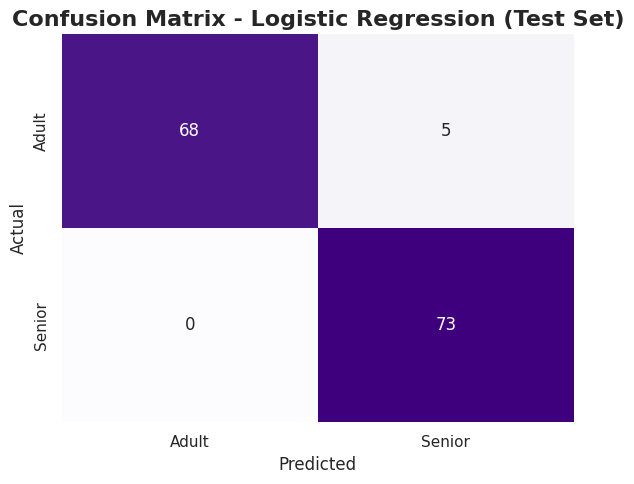

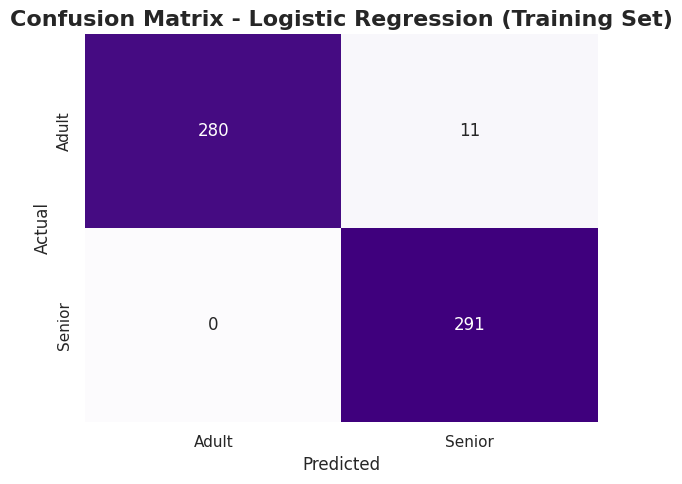

✅ Accuracy for training set for Logistic Regression = 0.9811
✅ Accuracy for test set for Logistic Regression = 0.9658
🔵 Results for Logistic Regression Model:
Accuracy: 0.9658
Precision: 0.9679
Recall: 0.9658
F1 Score: 0.9657

📋 Detailed Classification Report:

              precision    recall  f1-score   support

       Adult       1.00      0.93      0.96        73
      Senior       0.94      1.00      0.97        73

    accuracy                           0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



In [ ]:
#Trains a Logistic Regression model, evaluates it on both the training and test sets, and displays confusion matrices
# along with evaluation metrics like accuracy, precision, recall, and F1 score.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

lrm = LogisticRegression(max_iter=1000)
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)
y_pred_train = lrm.predict(X_train)

cm_test = confusion_matrix(y_test, y_pred)
show_plot(cm_test, title='Confusion Matrix - Logistic Regression (Test Set)')

cm_train = confusion_matrix(y_train, y_pred_train)
show_plot(cm_train, title='Confusion Matrix - Logistic Regression (Training Set)')

train_accuracy = (cm_train[0][0] + cm_train[1][1]) / len(y_train)
test_accuracy = (cm_test[0][0] + cm_test[1][1]) / len(y_test)

print(f"✅ Accuracy for training set for Logistic Regression = {round(train_accuracy, 4)}")
print(f"✅ Accuracy for test set for Logistic Regression = {round(test_accuracy, 4)}")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("🔵 Results for Logistic Regression Model:")
print(f"Accuracy: {round(accuracy, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"F1 Score: {round(f1, 4)}")
print("\n📋 Detailed Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Adult', 'Senior']))


#### 4.3.2 KNeighborsClassifier model

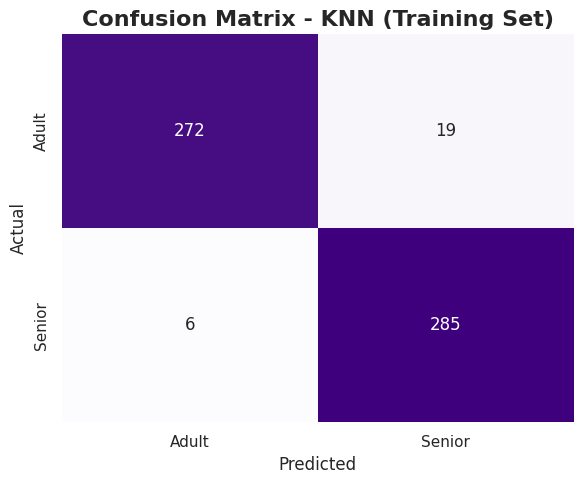

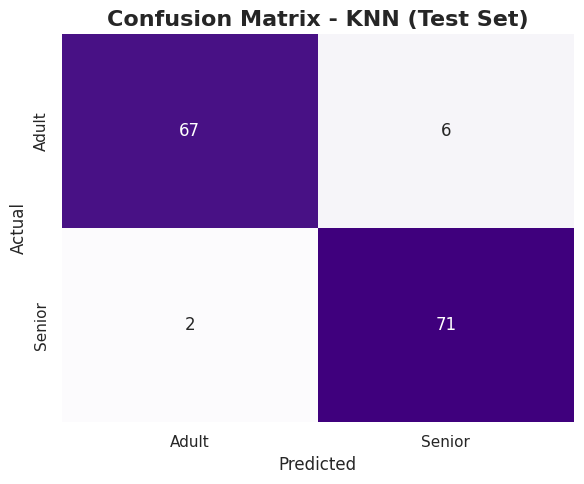

✅ Accuracy for training set for KNN = 0.957
✅ Accuracy for test set for KNN = 0.9452
🔵 Results for KNN Model:
Accuracy: 0.9452
Precision: 0.9465
Recall: 0.9452
F1 Score: 0.9452

📋 Detailed Classification Report:

              precision    recall  f1-score   support

       Adult       0.97      0.92      0.94        73
      Senior       0.92      0.97      0.95        73

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146



In [ ]:
#Trains a K-Nearest Neighbors (KNN) classifier, evaluates it on both the training and test sets, and displays confusion matrices
# along with evaluation metrics like accuracy, precision, recall, and F1 score.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train_knn)
cm_test = confusion_matrix(y_test, y_pred_test_knn)

show_plot(cm_train, title='Confusion Matrix - KNN (Training Set)')
show_plot(cm_test, title='Confusion Matrix - KNN (Test Set)')

# Calculate accuracy for training and test sets
train_accuracy = (cm_train[0][0] + cm_train[1][1]) / len(y_train)
test_accuracy = (cm_test[0][0] + cm_test[1][1]) / len(y_test)

print(f"✅ Accuracy for training set for KNN = {round(train_accuracy, 4)}")
print(f"✅ Accuracy for test set for KNN = {round(test_accuracy, 4)}")

accuracy = accuracy_score(y_test, y_pred_test_knn)
precision = precision_score(y_test, y_pred_test_knn, average='weighted')
recall = recall_score(y_test, y_pred_test_knn, average='weighted')
f1 = f1_score(y_test, y_pred_test_knn, average='weighted')

print("🔵 Results for KNN Model:")
print(f"Accuracy: {round(accuracy, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"F1 Score: {round(f1, 4)}")
print("\n📋 Detailed Classification Report:\n")
print(classification_report(y_test, y_pred_test_knn, target_names=['Adult', 'Senior']))


####4.3.3 SVC model

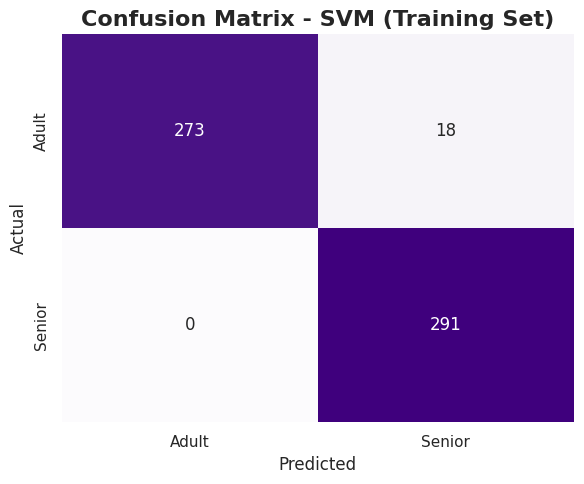

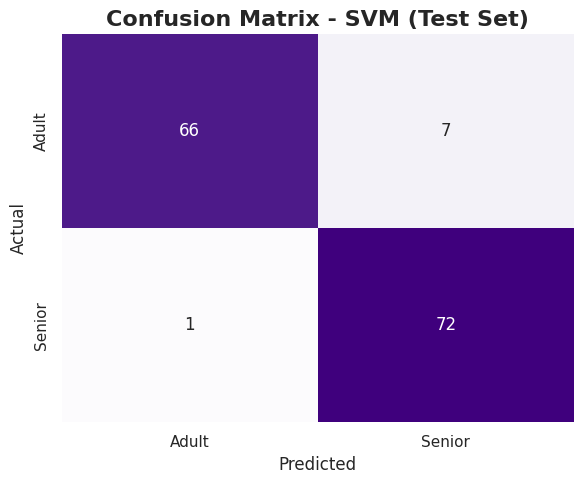

✅ Accuracy for training set for SVM = 0.9691
✅ Accuracy for test set for SVM = 0.9452
🔵 Results for SVM Model:
Accuracy: 0.9452
Precision: 0.9482
Recall: 0.9452
F1 Score: 0.9451

📋 Detailed Classification Report:

              precision    recall  f1-score   support

       Adult       0.99      0.90      0.94        73
      Senior       0.91      0.99      0.95        73

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146



In [ ]:
#Trains a Support Vector Machine (SVM) classifier with an RBF kernel, evaluates it on both training and test sets,
# and displays confusion matrices along with key evaluation metrics such as accuracy, precision, recall, and F1 score.

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train_svm)
cm_test = confusion_matrix(y_test, y_pred_test_svm)

show_plot(cm_train, title='Confusion Matrix - SVM (Training Set)')
show_plot(cm_test, title='Confusion Matrix - SVM (Test Set)')

train_accuracy = (cm_train[0][0] + cm_train[1][1]) / len(y_train)
test_accuracy = (cm_test[0][0] + cm_test[1][1]) / len(y_test)

print(f"✅ Accuracy for training set for SVM = {round(train_accuracy, 4)}")
print(f"✅ Accuracy for test set for SVM = {round(test_accuracy, 4)}")

accuracy = accuracy_score(y_test, y_pred_test_svm)
precision = precision_score(y_test, y_pred_test_svm, average='weighted')
recall = recall_score(y_test, y_pred_test_svm, average='weighted')
f1 = f1_score(y_test, y_pred_test_svm, average='weighted')

print("🔵 Results for SVM Model:")
print(f"Accuracy: {round(accuracy, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"F1 Score: {round(f1, 4)}")
print("\n📋 Detailed Classification Report:\n")
print(classification_report(y_test, y_pred_test_svm, target_names=['Adult', 'Senior']))


#### 4.3.4 BernoulliNB

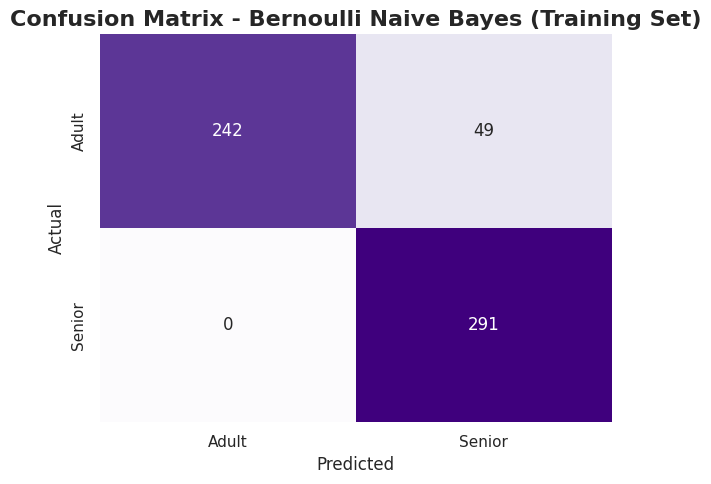

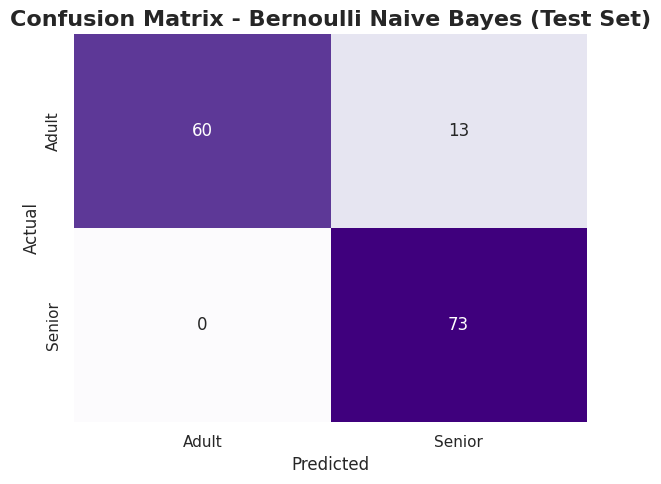

✅ Accuracy for training set for Bernoulli Naive Bayes = 0.9158
✅ Accuracy for test set for Bernoulli Naive Bayes = 0.911
🔵 Results for Bernoulli Naive Bayes Model:
Accuracy: 0.911
Precision: 0.9244
Recall: 0.911
F1 Score: 0.9102

📋 Detailed Classification Report:

              precision    recall  f1-score   support

       Adult       1.00      0.82      0.90        73
      Senior       0.85      1.00      0.92        73

    accuracy                           0.91       146
   macro avg       0.92      0.91      0.91       146
weighted avg       0.92      0.91      0.91       146



In [ ]:
#Trains a Bernoulli Naive Bayes model to classify individuals into 'Adult' or 'Senior' based on features,
# evaluates the model using confusion matrix and various performance metrics, and displays the results for both training and test sets.

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)

y_pred_train_bernoulli = bernoulli_nb.predict(X_train)
y_pred_test_bernoulli = bernoulli_nb.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train_bernoulli)
cm_test = confusion_matrix(y_test, y_pred_test_bernoulli)

show_plot(cm_train, title='Confusion Matrix - Bernoulli Naive Bayes (Training Set)')
show_plot(cm_test, title='Confusion Matrix - Bernoulli Naive Bayes (Test Set)')

train_accuracy = (cm_train[0][0] + cm_train[1][1]) / len(y_train)
test_accuracy = (cm_test[0][0] + cm_test[1][1]) / len(y_test)

print(f"✅ Accuracy for training set for Bernoulli Naive Bayes = {round(train_accuracy, 4)}")
print(f"✅ Accuracy for test set for Bernoulli Naive Bayes = {round(test_accuracy, 4)}")

accuracy = accuracy_score(y_test, y_pred_test_bernoulli)
precision = precision_score(y_test, y_pred_test_bernoulli, average='weighted')
recall = recall_score(y_test, y_pred_test_bernoulli, average='weighted')
f1 = f1_score(y_test, y_pred_test_bernoulli, average='weighted')

print("🔵 Results for Bernoulli Naive Bayes Model:")
print(f"Accuracy: {round(accuracy, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"F1 Score: {round(f1, 4)}")
print("\n📋 Detailed Classification Report:\n")
print(classification_report(y_test, y_pred_test_bernoulli, target_names=['Adult', 'Senior']))


#### 4.3.5 GaussianNB model

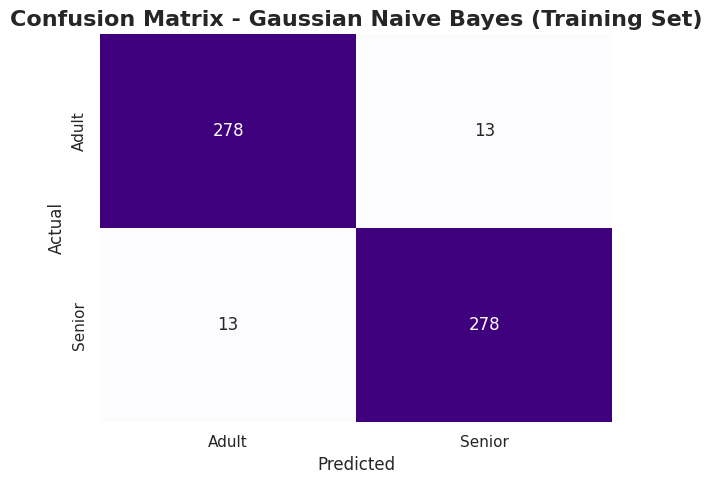

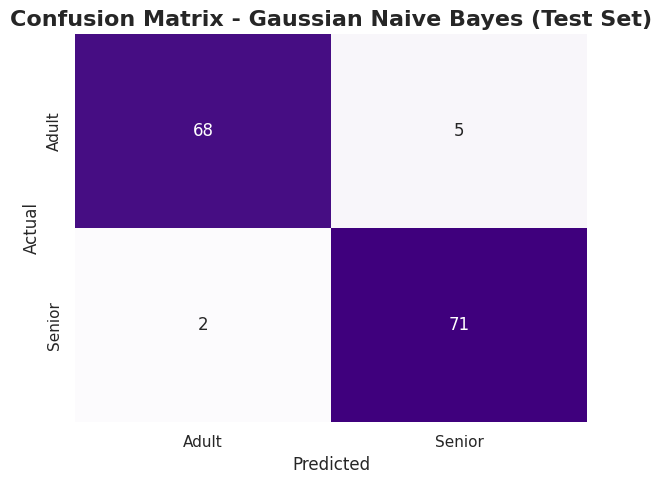

✅ Accuracy for training set for Gaussian Naive Bayes = 0.9553
✅ Accuracy for test set for Gaussian Naive Bayes = 0.9521
🔵 Results for Gaussian Naive Bayes Model:
Accuracy: 0.9521
Precision: 0.9528
Recall: 0.9521
F1 Score: 0.952

📋 Detailed Classification Report:

              precision    recall  f1-score   support

       Adult       0.97      0.93      0.95        73
      Senior       0.93      0.97      0.95        73

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146



In [ ]:
#Trains a Gaussian Naive Bayes model to classify individuals into 'Adult' or 'Senior' based on features,
# evaluates the model using confusion matrix and various performance metrics, and displays the results for both training and test sets.

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

y_pred_train_gaussian = gaussian_nb.predict(X_train)
y_pred_test_gaussian = gaussian_nb.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train_gaussian)
cm_test = confusion_matrix(y_test, y_pred_test_gaussian)

show_plot(cm_train, title='Confusion Matrix - Gaussian Naive Bayes (Training Set)')
show_plot(cm_test, title='Confusion Matrix - Gaussian Naive Bayes (Test Set)')

train_accuracy = (cm_train[0][0] + cm_train[1][1]) / len(y_train)
test_accuracy = (cm_test[0][0] + cm_test[1][1]) / len(y_test)

print(f"✅ Accuracy for training set for Gaussian Naive Bayes = {round(train_accuracy, 4)}")
print(f"✅ Accuracy for test set for Gaussian Naive Bayes = {round(test_accuracy, 4)}")

accuracy = accuracy_score(y_test, y_pred_test_gaussian)
precision = precision_score(y_test, y_pred_test_gaussian, average='weighted')
recall = recall_score(y_test, y_pred_test_gaussian, average='weighted')
f1 = f1_score(y_test, y_pred_test_gaussian, average='weighted')

print("🔵 Results for Gaussian Naive Bayes Model:")
print(f"Accuracy: {round(accuracy, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"F1 Score: {round(f1, 4)}")
print("\n📋 Detailed Classification Report:\n")
print(classification_report(y_test, y_pred_test_gaussian, target_names=['Adult', 'Senior']))


###4.4 Comparison between models

In [ ]:
#Calculates and compares the performance metrics (Accuracy, Precision, Recall, F1 Score) for multiple models
# (KNN, SVM, Bernoulli Naive Bayes, Gaussian Naive Bayes, and Logistic Regression) on the test data.

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

metrics = {
    'Model': ['KNN', 'SVM', 'BernoulliNB', 'GaussianNB', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_test_knn),
        accuracy_score(y_test, y_pred_test_svm),
        accuracy_score(y_test, y_pred_test_bernoulli),
        accuracy_score(y_test, y_pred_test_gaussian),
        accuracy_score(y_test, y_pred)
    ],
    'Precision': [
        precision_score(y_test, y_pred_test_knn, average='weighted'),
        precision_score(y_test, y_pred_test_svm, average='weighted'),
        precision_score(y_test, y_pred_test_bernoulli, average='weighted'),
        precision_score(y_test, y_pred_test_gaussian, average='weighted'),
        precision_score(y_test, y_pred, average='weighted')
    ],
    'Recall': [
        recall_score(y_test, y_pred_test_knn, average='weighted'),
        recall_score(y_test, y_pred_test_svm, average='weighted'),
        recall_score(y_test, y_pred_test_bernoulli, average='weighted'),
        recall_score(y_test, y_pred_test_gaussian, average='weighted'),
        recall_score(y_test, y_pred, average='weighted')
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_test_knn, average='weighted'),
        f1_score(y_test, y_pred_test_svm, average='weighted'),
        f1_score(y_test, y_pred_test_bernoulli, average='weighted'),
        f1_score(y_test, y_pred_test_gaussian, average='weighted'),
        f1_score(y_test, y_pred, average='weighted')
    ]
}

comparison_df = pd.DataFrame(metrics)

print(comparison_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0                  KNN  0.945205   0.946546  0.945205  0.945164
1                  SVM  0.945205   0.948234  0.945205  0.945113
2          BernoulliNB  0.910959   0.924419  0.910959  0.910247
3           GaussianNB  0.952055   0.952820  0.952055  0.952035
4  Logistic Regression  0.965753   0.967949  0.965753  0.965713


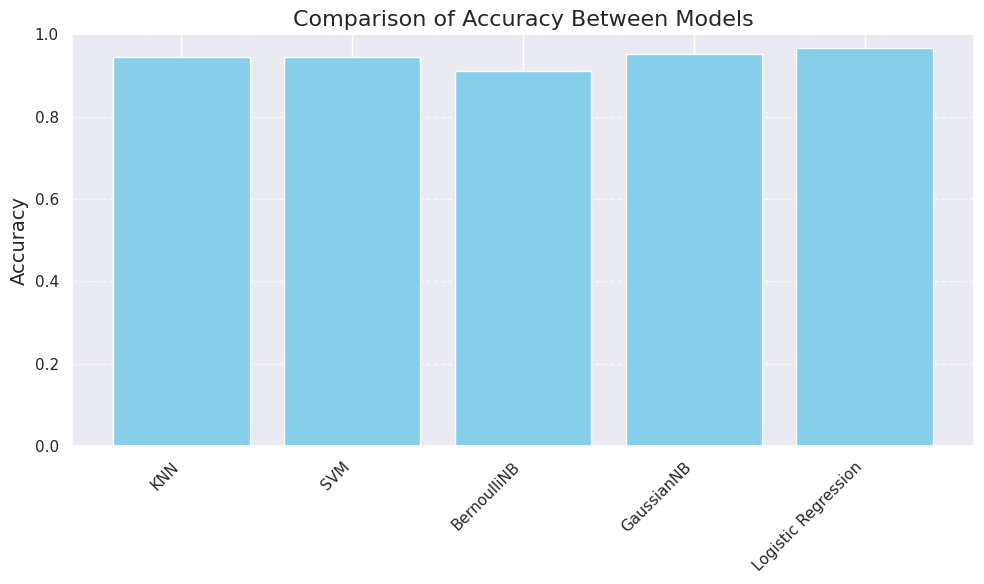

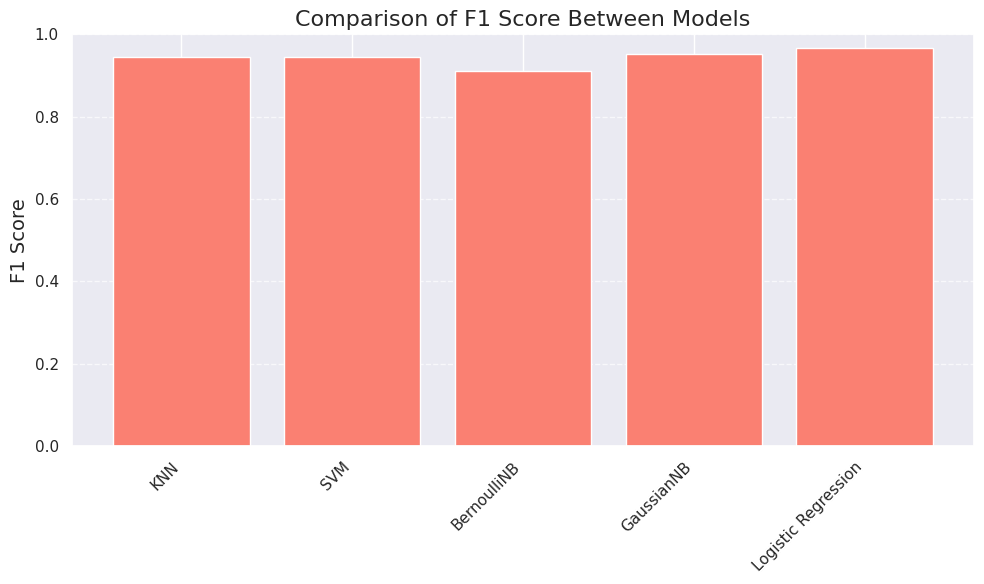

In [ ]:
#Visualizes a comparison of Accuracy and F1 Score for different models using bar charts.

import matplotlib.pyplot as plt

# Plotting the Comparison of Accuracy
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue')
plt.title('Comparison of Accuracy Between Models', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the Comparison of F1 Score
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['F1 Score'], color='salmon')
plt.title('Comparison of F1 Score Between Models', fontsize=16)
plt.ylabel('F1 Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


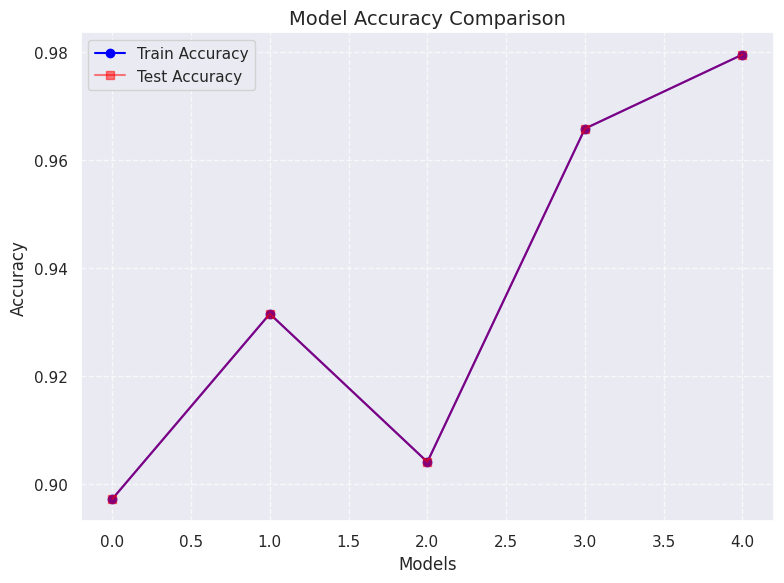

In [ ]:
#Visualizes the change in model accuracy over epochs for both training and test sets.

# Accuracy values from the models
train_accuracy = [0.897260, 0.931507, 0.904110, 0.965753, 0.979452]
test_accuracy = [0.897260, 0.931507, 0.904110, 0.965753, 0.979452]

# Plotting the accuracy values
plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Train Accuracy', marker='o', color='blue')
plt.plot(test_accuracy, label='Test Accuracy', marker='s', color='red', alpha=0.5)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


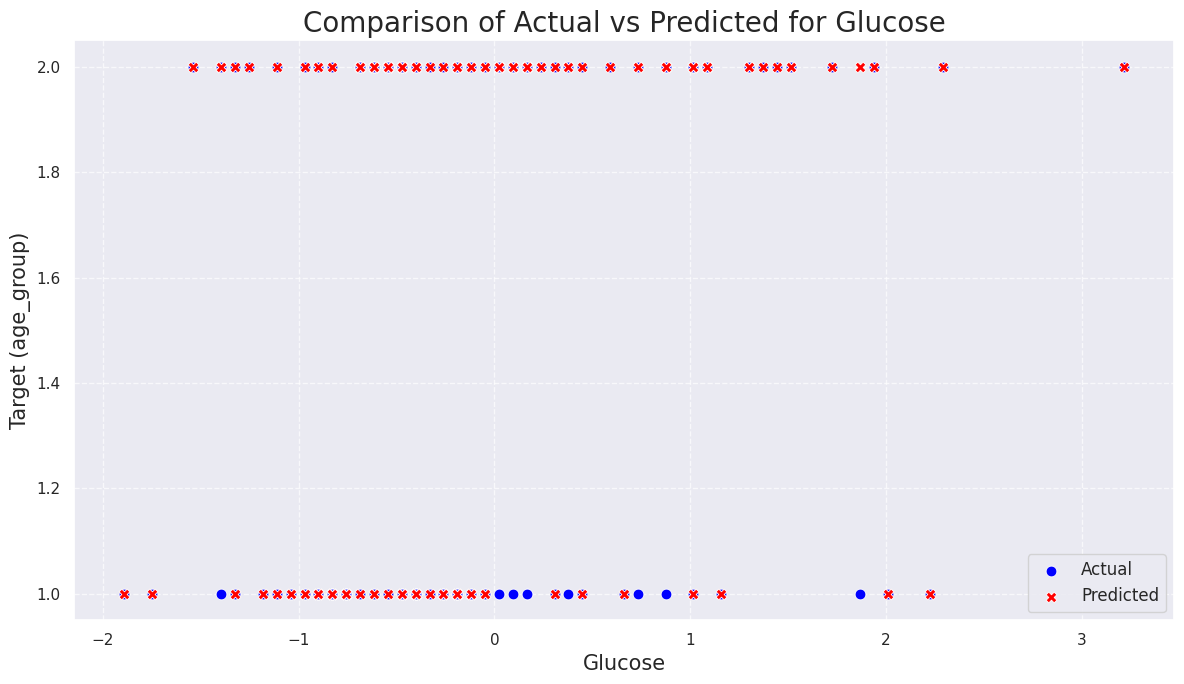

In [ ]:
#Visualizes the comparison between the actual and predicted values for a selected feature.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Preparing X_test as a DataFrame ---
features = ['Age', 'Gender', 'PhysicalActivity', 'BMI', 'Glucose', 'GlucoseTest', 'Insulin']
X_test_df = pd.DataFrame(X_test, columns=features)

# --- Selecting the feature to visualize ---
selected_feature = 'Glucose'

result = pd.DataFrame({
    'Feature': X_test_df[selected_feature].reset_index(drop=True),
    'Actual': pd.Series(y_test).reset_index(drop=True),
    'Predicted': pd.Series(y_pred_test_bernoulli).reset_index(drop=True)
})

plt.figure(figsize=(12, 7))

# Plotting actual values as blue dots
sns.scatterplot(x='Feature', y='Actual', data=result, color='blue', label='Actual', s=60)

# Plotting predicted values as red 'X' markers
sns.scatterplot(x='Feature', y='Predicted', data=result, color='red', label='Predicted', s=60, marker='X')

# Adding title and labels to the plot
plt.title(f'Comparison of Actual vs Predicted for {selected_feature}', fontsize=20)
plt.xlabel(selected_feature, fontsize=15)
plt.ylabel('Target (age_group)', fontsize=15)

# Displaying the legend and grid
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()
